In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
%matplotlib inline 
import seaborn as sns


In [8]:
transaction = pd.read_csv('train_transaction.csv')

In [9]:
pd.set_option('max_columns', None)
pd.set_option('max_rows', None)
transaction.head()

TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0        2987000        0          86400            68.5         W  13926   
1        2987001        0          86401            29.0         W   2755   
2        2987002        0          86469            59.0         W   4663   
3        2987003        0          86499            50.0         W  18132   
4        2987004        0          86506            50.0         H   4497   

   card2  card3       card4  card5   card6  addr1  addr2  dist1  dist2  \
0    NaN  150.0    discover  142.0  credit  315.0   87.0   19.0    NaN   
1  404.0  150.0  mastercard  102.0  credit  325.0   87.0    NaN    NaN   
2  490.0  150.0        visa  166.0   debit  330.0   87.0  287.0    NaN   
3  567.0  150.0  mastercard  117.0   debit  476.0   87.0    NaN    NaN   
4  514.0  150.0  mastercard  102.0  credit  420.0   87.0    NaN    NaN   

  P_emaildomain R_emaildomain   C1   C2   C3   C4   C5   C6   C7   C8   C9  \
0           NaN           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
1     gmail.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
2   outlook.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
3     yahoo.com           NaN  2.0  5.0  0.0  0.0  0.0  4.0  0.0  0.0  1.0   
4     gmail.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0   

   C10  C11  C12   C13  C14     D1     D2    D3    D4   D5  D6  D7  D8  D9  \
0  0.0  2.0  0.0   1.0  1.0   14.0    NaN  13.0   NaN  NaN NaN NaN NaN NaN   
1  0.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   0.0  NaN NaN NaN NaN NaN   
2  0.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   0.0  NaN NaN NaN NaN NaN   
3  0.0  1.0  0.0  25.0  1.0  112.0  112.0   0.0  94.0  0.0 NaN NaN NaN NaN   
4  1.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   NaN  NaN NaN NaN NaN NaN   

    D10    D11  D12  D13  D14    D15   M1   M2   M3   M4   M5   M6   M7   M8  \
0  13.0   13.0  NaN  NaN  NaN    0.0    T    T    T   M2    F    T  NaN  NaN   
1   0.0    NaN  NaN  NaN  NaN    0.0  NaN  NaN  NaN   M0    T    T  NaN  NaN   
2   0.0  315.0  NaN  NaN  NaN  315.0    T    T    T   M0    F    F    F    F   
3  84.0    NaN  NaN  NaN  NaN  111.0  NaN  NaN  NaN   M0    T    F  NaN  NaN   
4   NaN    NaN  NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

    M9   V1   V2   V3   V4   V5   V6   V7   V8   V9  V10  V11  V12  V13  V14  \
0  NaN  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0   
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0  0.0  1.0   
2    F  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0   
3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0  1.0  1.0   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   V15  V16  V17  V18  V19  V20  V21  V22  V23  V24  V25  V26  V27  V28  V29  \
0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   V30  V31  V32  V33  V34  V35  V36  V37  V38  V39  V40  V41  V42  V43  V44  \
0  0.0  0.0  0.0  0.0  0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0   
2  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0   
3  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   V45  V46  V47  V48  V49  V50  V51  V52  V53  V54  V55  V56  V57  V58  V59  \
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0  1.0  1.0  1.0  0.0  0.0  0.0   
1  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  

In [10]:
identity = pd.read_csv('train_identity.csv')

In [11]:
identity.head()

TransactionID  id_01     id_02  id_03  id_04  id_05  id_06  id_07  id_08  \
0        2987004    0.0   70787.0    NaN    NaN    NaN    NaN    NaN    NaN   
1        2987008   -5.0   98945.0    NaN    NaN    0.0   -5.0    NaN    NaN   
2        2987010   -5.0  191631.0    0.0    0.0    0.0    0.0    NaN    NaN   
3        2987011   -5.0  221832.0    NaN    NaN    0.0   -6.0    NaN    NaN   
4        2987016    0.0    7460.0    0.0    0.0    1.0    0.0    NaN    NaN   

   id_09  id_10  id_11     id_12  id_13  id_14  id_15     id_16  id_17  id_18  \
0    NaN    NaN  100.0  NotFound    NaN -480.0    New  NotFound  166.0    NaN   
1    NaN    NaN  100.0  NotFound   49.0 -300.0    New  NotFound  166.0    NaN   
2    0.0    0.0  100.0  NotFound   52.0    NaN  Found     Found  121.0    NaN   
3    NaN    NaN  100.0  NotFound   52.0    NaN    New  NotFound  225.0    NaN   
4    0.0    0.0  100.0  NotFound    NaN -300.0  Found     Found  166.0   15.0   

   id_19  id_20  id_21  id_22 id_23  id_24  id_25  id_26 id_27  id_28  \
0  542.0  144.0    NaN    NaN   NaN    NaN    NaN    NaN   NaN    New   
1  621.0  500.0    NaN    NaN   NaN    NaN    NaN    NaN   NaN    New   
2  410.0  142.0    NaN    NaN   NaN    NaN    NaN    NaN   NaN  Found   
3  176.0  507.0    NaN    NaN   NaN    NaN    NaN    NaN   NaN    New   
4  529.0  575.0    NaN    NaN   NaN    NaN    NaN    NaN   NaN  Found   

      id_29             id_30                id_31  id_32      id_33  \
0  NotFound       Android 7.0  samsung browser 6.2   32.0  2220x1080   
1  NotFound        iOS 11.1.2   mobile safari 11.0   32.0   1334x750   
2     Found               NaN          chrome 62.0    NaN        NaN   
3  NotFound               NaN          chrome 62.0    NaN        NaN   
4     Found  Mac OS X 10_11_6          chrome 62.0   24.0   1280x800   

            id_34 id_35 id_36 id_37 id_38 DeviceType  \
0  match_status:2     T     F     T     T     mobile   
1  match_status:1     T     F     F     T     mobile   
2             NaN     F     F     T     T    desktop   
3             NaN     F     F     T     T    desktop   
4  match_status:2     T     F     T     T    desktop   

                      DeviceInfo  
0  SAMSUNG SM-G892A Build/NRD90M  
1                     iOS Device  
2                        Windows  
3                            NaN  
4                          MacOS

In [12]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 394 entries, TransactionID to V339
dtypes: float64(376), int64(4), object(14)
memory usage: 1.7+ GB


In [13]:
transaction.dtypes

TransactionID       int64
isFraud             int64
TransactionDT       int64
TransactionAmt    float64
ProductCD          object
card1               int64
card2             float64
card3             float64
card4              object
card5             float64
card6              object
addr1             float64
addr2             float64
dist1             float64
dist2             float64
P_emaildomain      object
R_emaildomain      object
C1                float64
C2                float64
C3                float64
C4                float64
C5                float64
C6                float64
C7                float64
C8                float64
C9                float64
C10               float64
C11               float64
C12               float64
C13               float64
C14               float64
D1                float64
D2                float64
D3                float64
D4                float64
D5                float64
D6                float64
D7                float64
D8          

In [14]:
transaction["isFraud"].value_counts()

0    569877
1     20663
Name: isFraud, dtype: int64

In [15]:
  round(20663/(20663+569877)*100,2)

3.5

In [16]:
transaction.isna().sum(axis=0) > 0

TransactionID     False
isFraud           False
TransactionDT     False
TransactionAmt    False
ProductCD         False
card1             False
card2              True
card3              True
card4              True
card5              True
card6              True
addr1              True
addr2              True
dist1              True
dist2              True
P_emaildomain      True
R_emaildomain      True
C1                False
C2                False
C3                False
C4                False
C5                False
C6                False
C7                False
C8                False
C9                False
C10               False
C11               False
C12               False
C13               False
C14               False
D1                 True
D2                 True
D3                 True
D4                 True
D5                 True
D6                 True
D7                 True
D8                 True
D9                 True
D10                True
D11             

In [17]:
transaction.isna().sum(axis=0) 

TransactionID          0
isFraud                0
TransactionDT          0
TransactionAmt         0
ProductCD              0
card1                  0
card2               8933
card3               1565
card4               1577
card5               4259
card6               1571
addr1              65706
addr2              65706
dist1             352271
dist2             552913
P_emaildomain      94456
R_emaildomain     453249
C1                     0
C2                     0
C3                     0
C4                     0
C5                     0
C6                     0
C7                     0
C8                     0
C9                     0
C10                    0
C11                    0
C12                    0
C13                    0
C14                    0
D1                  1269
D2                280797
D3                262878
D4                168922
D5                309841
D6                517353
D7                551623
D8                515614
D9                515614


In [18]:
transaction.head(15)

TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0         2987000        0          86400          68.500         W  13926   
1         2987001        0          86401          29.000         W   2755   
2         2987002        0          86469          59.000         W   4663   
3         2987003        0          86499          50.000         W  18132   
4         2987004        0          86506          50.000         H   4497   
5         2987005        0          86510          49.000         W   5937   
6         2987006        0          86522         159.000         W  12308   
7         2987007        0          86529         422.500         W  12695   
8         2987008        0          86535          15.000         H   2803   
9         2987009        0          86536         117.000         W  17399   
10        2987010        0          86549          75.887         C  16496   
11        2987011        0          86555          16.495         C   4461   
12        2987012        0          86564          50.000         W   3786   
13        2987013        0          86585          40.000         W  12866   
14        2987014        0          86596          10.500         W  11839   

    card2  card3       card4  card5   card6  addr1  addr2  dist1  dist2  \
0     NaN  150.0    discover  142.0  credit  315.0   87.0   19.0    NaN   
1   404.0  150.0  mastercard  102.0  credit  325.0   87.0    NaN    NaN   
2   490.0  150.0        visa  166.0   debit  330.0   87.0  287.0    NaN   
3   567.0  150.0  mastercard  117.0   debit  476.0   87.0    NaN    NaN   
4   514.0  150.0  mastercard  102.0  credit  420.0   87.0    NaN    NaN   
5   555.0  150.0        visa  226.0   debit  272.0   87.0   36.0    NaN   
6   360.0  150.0        visa  166.0   debit  126.0   87.0    0.0    NaN   
7   490.0  150.0        visa  226.0   debit  325.0   87.0    NaN    NaN   
8   100.0  150.0        visa  226.0   debit  337.0   87.0    NaN    NaN   
9   111.0  150.0  mastercard  224.0   debit  204.0   87.0   19.0    NaN   
10  352.0  117.0  mastercard  134.0  credit    NaN    NaN    NaN    NaN   
11  375.0  185.0  mastercard  224.0   debit    NaN    NaN    NaN   30.0   
12  418.0  150.0        visa  226.0   debit  204.0   87.0    NaN    NaN   
13  303.0  150.0        visa  226.0   debit  330.0   87.0    NaN    NaN   
14  490.0  150.0        visa  226.0   debit  226.0   87.0    NaN    NaN   

    P_emaildomain R_emaildomain   C1   C2   C3   C4   C5   C6   C7   C8   C9  \
0             NaN           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
1       gmail.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
2     outlook.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
3       yahoo.com           NaN  2.0  5.0  0.0  0.0  0.0  4.0  0.0  0.0  1.0   
4       gmail.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0   
5       gmail.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
6       yahoo.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
7        mail.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
8   anonymous.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0   
9       yahoo.com           NaN  2.0  2.0  0.0  0.0  0.0  3.0  0.0  0.0  3.0   
10      gmail.com     gmail.com  1.0  4.0  0.0  1.0  0.0  1.0  1.0  1.0  0.0   
11    hotmail.com   hotmail.com  1.0  1.0  0.0  1.0  0.0  1.0  1.0  1.0  0.0   
12    verizon.net           NaN  4.0  2.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
13        aol.com           NaN  6.0  5.0  0.0  0.0  2.0  3.0  0.0  0.0  3.0   
14      yahoo.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   

    C10  C11  C12   C13  C14     D1     D2    D3     D4    D5   D6   D7    D8  \
0   0.0  2.0  0.0   1.0  1.0   14.0    NaN  13.0    NaN   NaN  NaN  NaN   NaN   
1   0.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN    0.0   NaN  NaN  NaN   NaN   
2   0.0  1.0  0.0   1.0  1.0  

In [19]:
transaction["TransactionAmt"].describe()

count    590540.000000
mean        135.027176
std         239.162522
min           0.251000
25%          43.321000
50%          68.769000
75%         125.000000
max       31937.391000
Name: TransactionAmt, dtype: float64

In [252]:
sum(transaction["TransactionAmt"]>2500)

976

In [255]:
transaction.loc[transaction["TransactionAmt"]<=2500,"TransactionAmt"].describe()

count    589564.000000
mean        130.099212
std         198.001835
min           0.251000
25%          43.000000
50%          68.500000
75%         123.821000
max        2500.000000
Name: TransactionAmt, dtype: float64

<AxesSubplot:>

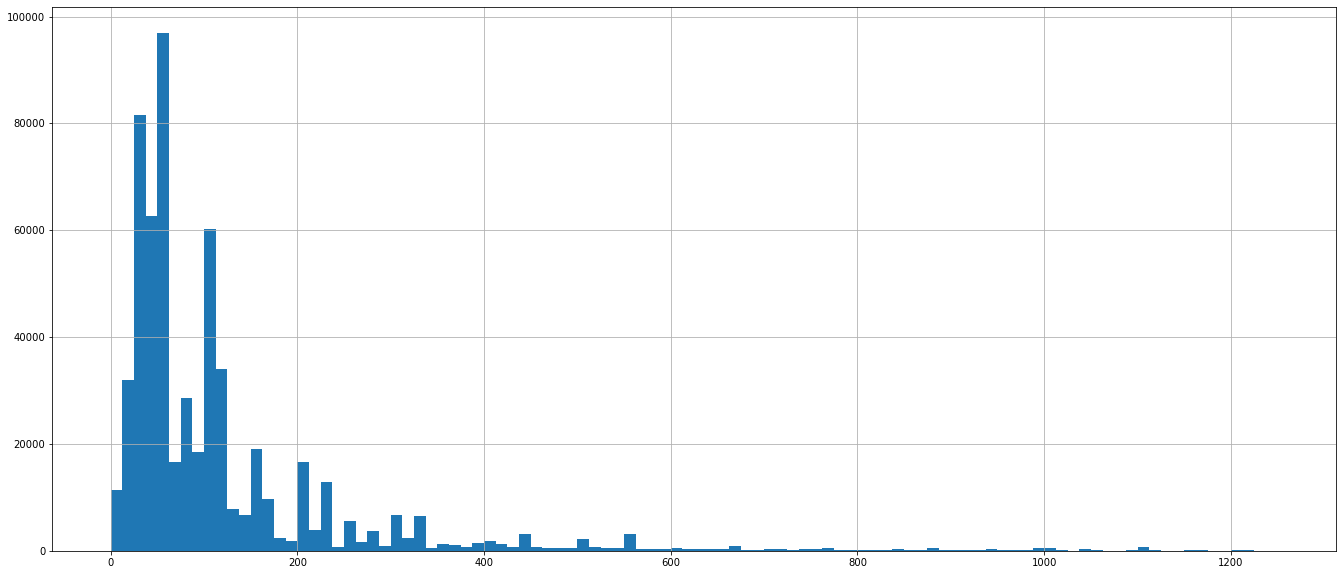

In [288]:
fig = plt.figure(figsize=(23,10))
transaction.loc[transaction["TransactionAmt"]<=2500,"TransactionAmt"].hist(bins=100,range=(0,1250))

<AxesSubplot:>

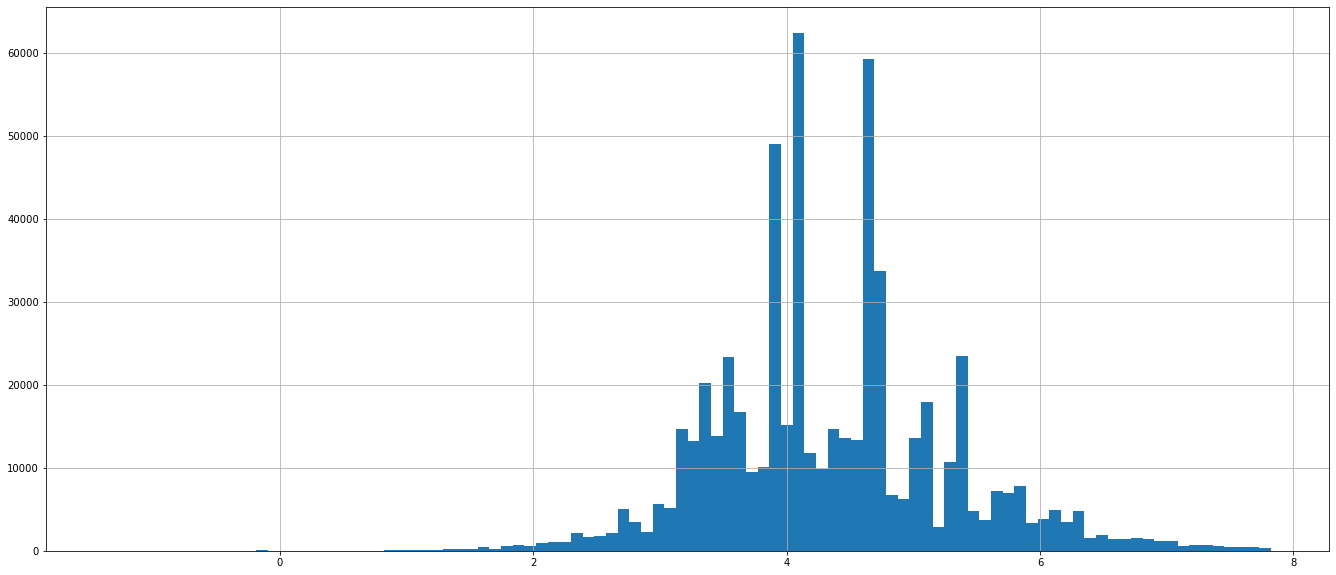

In [299]:
fig = plt.figure(figsize=(23,10))
log_pmt = np.log(transaction.loc[transaction["TransactionAmt"]<=2500,"TransactionAmt"])                
log_pmt.hist(bins=100)

In [280]:
# amp=transaction.loc[transaction["TransactionAmt"]<=2500,]
# amp.info()
# amp.loc[:,"TransactionAmt"].describe()
amp.loc[amp["isFraud"]==1,"TransactionAmt"].describe()

count    20639.000000
mean       145.753505
std        207.670377
min          0.292000
25%         35.044000
50%         75.000000
75%        160.975000
max       2480.060000
Name: TransactionAmt, dtype: float64

In [281]:
amp.loc[amp["isFraud"]==0,"TransactionAmt"].describe()

count    568925.000000
mean        129.531318
std         197.619081
min           0.251000
25%          43.970000
50%          68.500000
75%         117.533000
max        2500.000000
Name: TransactionAmt, dtype: float64

In [284]:
amp["isFraud"].value_counts()

0    568925
1     20639
Name: isFraud, dtype: int64

In [270]:
amp=transaction["TransactionAmt"]<=2500
transaction.loc[amp & transaction["isFraud"]==0,"TransactionAmt"].describe()

count    569901.000000
mean        134.638722
std         240.216734
min           0.251000
25%          43.970000
50%          68.500000
75%         120.000000
max       31937.391000
Name: TransactionAmt, dtype: float64

In [ ]:
plt.scatter(transaction.loc[transaction["TransactionAmt"]<=2500,"TransactionAmt"],)

In [23]:
transaction["ProductCD"].value_counts()

W    439670
C     68519
R     37699
H     33024
S     11628
Name: ProductCD, dtype: int64

In [24]:
transaction.loc[transaction["isFraud"]==1,"ProductCD"].value_counts()

W    8969
C    8008
H    1574
R    1426
S     686
Name: ProductCD, dtype: int64

In [25]:
transaction["card4"].value_counts()

visa                384767
mastercard          189217
american express      8328
discover              6651
Name: card4, dtype: int64

In [26]:
transaction.loc[transaction["isFraud"]==1,"card4"].value_counts()

visa                13373
mastercard           6496
discover              514
american express      239
Name: card4, dtype: int64

In [27]:
transaction["card6"].value_counts()

debit              439938
credit             148986
debit or credit        30
charge card            15
Name: card6, dtype: int64

In [28]:
transaction.loc[transaction["isFraud"]==1,"card6"].value_counts()

debit     10674
credit     9950
Name: card6, dtype: int64

In [29]:
transaction["TransactionDT"].describe()

count    5.905400e+05
mean     7.372311e+06
std      4.617224e+06
min      8.640000e+04
25%      3.027058e+06
50%      7.306528e+06
75%      1.124662e+07
max      1.581113e+07
Name: TransactionDT, dtype: float64

In [30]:
transaction["TransactionDT"].describe().max

<bound method Series.max of count    5.905400e+05
mean     7.372311e+06
std      4.617224e+06
min      8.640000e+04
25%      3.027058e+06
50%      7.306528e+06
75%      1.124662e+07
max      1.581113e+07
Name: TransactionDT, dtype: float64>

In [31]:
1.581113e+07/8.640000e+04

182.99918981481483

In [33]:
len(transaction["card2"].unique())

501

In [34]:
transaction["card3"].unique()

array([150., 117., 185., 143., 144., 163., 146., 191., 162., 119., 147.,
       100., 135., 137., 138., 102., 213., 106., 214., 148., 210., 203.,
       194., 141., 225.,  nan, 188., 193., 208., 133., 223., 134., 153.,
       131., 200., 149., 116., 222., 220., 197., 129., 206., 195., 204.,
       127., 142., 111., 159., 118., 229., 217., 212., 227., 166., 189.,
       120., 171., 190., 105., 130., 170., 180., 177., 132., 109., 198.,
       121., 183., 215., 156., 207., 186., 167., 152., 199., 219., 202.,
       126., 182., 123., 107., 221., 124., 231., 157., 136., 128., 168.,
       101., 108., 125., 211., 164., 160., 161., 179., 155., 169., 205.,
       209., 226., 174., 176., 181., 224., 122., 201., 175., 139., 172.,
       114., 228., 184., 151., 173.])

In [35]:
transaction["card3"].value_counts()

150.0    521287
185.0     56346
106.0      1571
146.0      1252
144.0      1252
117.0       962
143.0       899
119.0       750
102.0       460
147.0       390
162.0       339
203.0       253
213.0       221
100.0       202
200.0       184
188.0       175
131.0       172
134.0       166
149.0       127
135.0       120
229.0       118
210.0       104
195.0       101
121.0        99
159.0        82
197.0        81
137.0        71
138.0        70
214.0        66
148.0        61
223.0        55
204.0        51
133.0        50
141.0        49
166.0        47
212.0        46
215.0        44
142.0        40
182.0        39
111.0        39
177.0        33
198.0        31
190.0        31
127.0        28
194.0        25
126.0        23
191.0        18
118.0        17
227.0        17
217.0        17
189.0        14
222.0        13
180.0        13
152.0        13
168.0        11
211.0        11
171.0        10
130.0        10
219.0         9
163.0         9
129.0         9
183.0         9
116.0   

In [36]:
transaction.loc[transaction["isFraud"]==1,"card3"].value_counts()

150.0    12807
185.0     7362
144.0      112
119.0       70
143.0       28
146.0       25
106.0       24
117.0       18
223.0       14
102.0       11
134.0       11
100.0       10
191.0        7
147.0        7
182.0        7
214.0        6
188.0        6
203.0        6
135.0        6
198.0        6
121.0        5
142.0        5
133.0        4
118.0        4
127.0        4
181.0        3
141.0        3
137.0        3
162.0        3
213.0        3
210.0        3
160.0        3
131.0        2
159.0        2
206.0        2
129.0        2
200.0        2
177.0        2
149.0        2
138.0        2
231.0        1
132.0        1
204.0        1
157.0        1
197.0        1
125.0        1
224.0        1
175.0        1
155.0        1
229.0        1
111.0        1
215.0        1
139.0        1
219.0        1
168.0        1
166.0        1
180.0        1
126.0        1
195.0        1
183.0        1
167.0        1
208.0        1
Name: card3, dtype: int64

In [37]:
len(transaction["card3"].unique())

115

In [38]:
transaction["card5"].unique()

array([142., 102., 166., 117., 226., 224., 134., 219., 137., 195., 138.,
       100., 147., 162., 202., 118., 150., 183., 171., 236., 197., 133.,
       223., 149., 228., 229.,  nan, 198., 182., 126., 185., 190., 131.,
       144., 141., 215., 203., 237., 132., 143., 146., 140., 129., 199.,
       194., 213., 111., 169., 177., 173., 156., 119., 135., 107., 232.,
       188., 159., 127., 148., 139., 104., 210., 180., 207., 204., 212.,
       106., 152., 222., 187., 200., 214., 189., 181., 206., 225., 157.,
       121., 217., 184., 167., 113., 136., 120., 201., 211., 122., 164.,
       123., 145., 172., 114., 231., 105., 221., 234., 130., 109., 196.,
       101., 158., 230., 128., 191., 165., 115., 233., 216., 116., 178.,
       125., 163., 205., 112., 168., 209., 235., 151., 175., 160.])

In [39]:
len(transaction["card5"].unique())

120

In [40]:
transaction["card5"].value_counts()

226.0    296546
224.0     81513
166.0     57140
102.0     29105
117.0     25941
138.0     19737
195.0     16945
137.0     11720
126.0     10298
219.0      9924
202.0      7103
162.0      4524
229.0      2048
197.0      1551
150.0      1338
100.0       978
223.0       936
118.0       752
190.0       744
146.0       671
198.0       670
236.0       647
185.0       474
203.0       428
147.0       417
141.0       341
129.0       325
142.0       277
194.0       259
183.0       258
228.0       248
144.0       219
119.0       219
131.0       205
132.0       203
135.0       196
133.0       145
134.0        94
207.0        82
213.0        79
177.0        77
149.0        77
232.0        69
222.0        64
237.0        49
215.0        44
143.0        43
212.0        42
159.0        36
184.0        33
182.0        30
199.0        28
188.0        26
127.0        25
111.0        25
225.0        24
104.0        23
233.0        19
189.0        15
136.0        13
139.0        13
107.0        12
121.0   

In [147]:
transaction.groupby(['card5', 'card1']).size()

card5  card1
100.0  1323         7
       1580         1
       1595       129
       1760         2
       2177        15
       3495         2
       3822        71
       4474         3
       5079        24
       6013         2
       6132         2
       6230        34
       6329         3
       6500         2
       6580       189
       6801         1
       8161         8
       8412         4
       8769         1
       9152         9
       9785        85
       9788         1
       9896         1
       10355        2
       11149       20
       11283        1
       11338        1
       11357        3
       11783       10
       11879        9
       12052        1
       13469       65
       13475        1
       13615       57
       13748        9
       14403        2
       14413        1
       14429        1
       16139        1
       16567        1
       17003       11
       17746      183
       17853        2
       18007        1
101.0  12188       

In [826]:
transaction.groupby(['card5', 'card2']).size()

card5  card2
100.0  111.0        2
       122.0       69
       208.0        3
       225.0        1
       268.0       10
       284.0      189
       321.0      129
       327.0      117
       340.0        1
       343.0       85
       345.0        2
       360.0       28
       361.0       24
       396.0        8
       445.0        4
       468.0        9
       480.0       24
       490.0        4
       512.0       47
       555.0      152
       596.0        1
101.0  555.0        7
102.0  100.0       17
       103.0       40
       110.0       60
       111.0      415
       123.0       15
       127.0       26
       130.0       84
       134.0        3
       139.0        3
       146.0       43
       159.0        7
       161.0      100
       168.0        4
       170.0     9260
       171.0        9
       176.0       99
       177.0       82
       190.0       20
       191.0       16
       199.0       40
       208.0       22
       209.0       16
       216.0       

In [831]:
pd.crosstab(transaction['card5'],transaction['card2'])

card2  100.0  101.0  102.0  103.0  104.0  105.0  106.0  108.0  109.0  110.0  \
card5                                                                         
100.0      0      0      0      0      0      0      0      0      0      0   
101.0      0      0      0      0      0      0      0      0      0      0   
102.0     17      0      0     40      0      0      0      0      0     60   
104.0      0      0      0      0      0      0      0      0      0      0   
105.0      0      0      0      0      0      0      0      0      0      0   
106.0      0      0      0      0      0      0      0      0      0      0   
107.0      0      0      0      0      0      0      0      0      0      0   
109.0      0      0      0      0      0      0      0      0      0      0   
111.0      0      0      0      0      0      0      0      0      0      0   
112.0      0      0      0      0      0      0      0      0      0      0   
113.0      0      0      0      0      0      0      0      0      0      0   
114.0      0      0      0      0      0      0      0      0      0      0   
115.0      0      0      0      0      0      0      0      0      0      0   
116.0      0      0      0      0      0      0      0      0      0      0   
117.0      0      0    308      0      0      0      0     87      0      0   
118.0      0      0      0      0      0      0      0      0      0      0   
119.0      0      0      0      0      0      0      0      0      0      0   
120.0      0      0      0      0      0      0      0      0      0      0   
121.0      0      0      0      0      0      0      0      0      0      0   
122.0      0      0      0      0      0      0      0      0      0      0   
123.0      0      0      0      0      0      0      0      0      0      0   
125.0      0      0      0      0      0      0      0      0      0      0   
126.0      0      0      0      0      0      0      0      0      0      0   
127.0      0      0      0      0      0      0      0      0      0      0   
128.0      0      0      0      0      0      0      0      0      0      0   
129.0      0      0      0      0      0      0      0      0      0      0   
130.0      0      0      0      0      0      0      0      0      0      0   
131.0      0      0      0      0      0      0      0      0      0      0   
132.0      0      0      0      0      0      0      0      0      0      0   
133.0      0      0      0      0      0      0      0      0      0      0   
134.0      0      0      0      0      0      0      0      0      0      0   
135.0      0      0      0      0      0      0      0      0      0      0   
136.0      0      0      0      0      0      0      0      0      0      0   
137.0      0      0      0    415    748      0      0      0      0     19   
138.0      0      0      0   1185      0      0      0      0      0     59   
139.0      0      0      0      0      0      0      0      0      0      0   
140.0      0      0      0      0      0      0      0      0      0      0   
141.0      0      0      0      0      0      0      0      0      0      0   
142.0      0      0      0      0      0      0      0      0      0      0   
143.0      0      0      0      0      0      0      0      0      0      0   
144.0      0      0      0      0      0      0      0      0      0      0   
145.0      0      0      0      0      0      0      0      0      0      0   
146.0      0      0      0      0      0      0      0      0      0      0   
147.0      0      0      0      0      0      0      0      0      0      0   
148.0      0      0      0      0      0      0      0      0      0      0   
149.0      0      0      0      0      0      0      0      0      0      0   
150.0      0      0      0      0      0      0      0      0      0      0   
151.0      0      0      0      0      0      0      0      0      0      0   
152.0      0      0      0      0      0      0   

In [41]:
tmp=pd.DataFrame(transaction.loc[transaction["isFraud"]==1,"card5"].value_counts())

In [42]:
tmp1=pd.DataFrame(transaction["card5"].value_counts())

In [43]:
tmp2=pd.concat([tmp,tmp1],axis=1, join = 'inner')
tmp2.columns=['fraud','total']

In [44]:
tmp2['fraud_rate']=round(tmp2.iloc[:,0]/tmp2.iloc[:,1]*100,1)

In [45]:
tmp2

fraud   total  fraud_rate
226.0   8753  296546         3.0
224.0   3152   81513         3.9
102.0   1832   29105         6.3
137.0   1725   11720        14.7
138.0   1682   19737         8.5
195.0    681   16945         4.0
166.0    630   57140         1.1
219.0    571    9924         5.8
117.0    354   25941         1.4
162.0    301    4524         6.7
126.0    105   10298         1.0
197.0     86    1551         5.5
223.0     83     936         8.9
202.0     58    7103         0.8
147.0     47     417        11.3
198.0     34     670         5.1
229.0     32    2048         1.6
141.0     32     341         9.4
203.0     28     428         6.5
150.0     23    1338         1.7
146.0     23     671         3.4
190.0     20     744         2.7
236.0     20     647         3.1
185.0     19     474         4.0
100.0     18     978         1.8
144.0     16     219         7.3
118.0     15     752         2.0
228.0     13     248         5.2
194.0     13     259         5.0
142.0     12     277         4.3
129.0      9     325         2.8
135.0      8     196         4.1
133.0      8     145         5.5
132.0      7     203         3.4
119.0      6     219         2.7
149.0      5      77         6.5
212.0      5      42        11.9
107.0      4      12        33.3
232.0      4      69         5.8
143.0      4      43         9.3
139.0      3      13        23.1
183.0      3     258         1.2
159.0      2      36         5.6
237.0      2      49         4.1
134.0      1      94         1.1
199.0      1      28         3.6
167.0      1       1       100.0
191.0      1       2        50.0
131.0      1     205         0.5

In [46]:
def fraud_rate_calc(str,n=1000):
    tmp=pd.DataFrame(transaction.loc[transaction["isFraud"]==1,str].value_counts())
    tmp1=pd.DataFrame(transaction[str].value_counts())
    tmp2=pd.concat([tmp,tmp1],axis=1, join = 'inner')
    tmp2.columns=['fraud','total']
    tmp2['fraud_rate']=round(tmp2.iloc[:,0]/tmp2.iloc[:,1]*100,1)
    tmp3=tmp2.sort_values("fraud_rate",ascending=False)
    tmp4=tmp3.loc[tmp3["total"]>=n]
    return tmp4

In [47]:
fraud_rate_calc("card5")

fraud   total  fraud_rate
137.0   1725   11720        14.7
138.0   1682   19737         8.5
162.0    301    4524         6.7
102.0   1832   29105         6.3
219.0    571    9924         5.8
197.0     86    1551         5.5
195.0    681   16945         4.0
224.0   3152   81513         3.9
226.0   8753  296546         3.0
150.0     23    1338         1.7
229.0     32    2048         1.6
117.0    354   25941         1.4
166.0    630   57140         1.1
126.0    105   10298         1.0
202.0     58    7103         0.8

In [845]:
fraud_rate_calc("card3")

fraud   total  fraud_rate
185.0   7362   56346        13.1
144.0    112    1252         8.9
150.0  12807  521287         2.5
146.0     25    1252         2.0
106.0     24    1571         1.5

In [49]:
fraud_rate_calc("card2")

fraud  total  fraud_rate
177.0    396   1642        24.1
142.0    405   1685        24.0
130.0    657   2746        23.9
296.0    483   2516        19.2
500.0    911   5045        18.1
548.0    107   1082         9.9
103.0    345   3468         9.9
327.0    452   5100         8.9
204.0    262   2994         8.8
545.0   1420  16355         8.7
408.0    673   8012         8.4
375.0    438   5473         8.0
453.0    169   2597         6.5
404.0    199   3056         6.5
181.0     92   1655         5.6
553.0    328   6495         5.1
158.0     55   1149         4.8
514.0    672  14541         4.6
417.0     99   2340         4.2
583.0    899  21803         4.1
562.0    129   3756         3.4
480.0     35   1090         3.2
170.0    570  18214         3.1
269.0    105   3338         3.1
445.0     70   2430         2.9
481.0    186   6336         2.9
321.0   1396  48935         2.9
399.0    204   7180         2.8
225.0    204   7445         2.7
174.0    288  11310         2.5
490.0    916  38145         2.4
310.0     77   3255         2.4
264.0     67   2746         2.4
555.0    959  41995         2.3
298.0    101   4356         2.3
343.0     23   1063         2.2
111.0    978  45191         2.2
393.0     40   1933         2.1
127.0     29   1350         2.1
250.0     53   2688         2.0
512.0    200  10126         2.0
161.0     67   3541         1.9
494.0     61   3136         1.9
532.0     35   2040         1.7
361.0    135   7827         1.7
383.0     17   1066         1.6
567.0    100   6137         1.6
215.0    108   7281         1.5
390.0     42   2896         1.5
276.0     15   1010         1.5
418.0     26   1846         1.4
100.0     97   7570         1.3
122.0     34   2519         1.3
470.0     15   1228         1.2
455.0     30   2979         1.0
360.0    158  15190         1.0
452.0     15   1682         0.9
194.0    130  16938         0.8
199.0     10   1385         0.7
268.0     46   6239         0.7
476.0     43   5822         0.7
543.0     36   5451         0.7
206.0     24   4208         0.6
513.0      7   1085         0.6
369.0      7   1881         0.4
517.0      3   1157         0.3
558.0      3   1482         0.2
302.0      1   1075         0.1

array([[<AxesSubplot:title={'center':'fraud'}>,
        <AxesSubplot:title={'center':'total'}>],
       [<AxesSubplot:title={'center':'fraud_rate'}>, <AxesSubplot:>]],
      dtype=object)

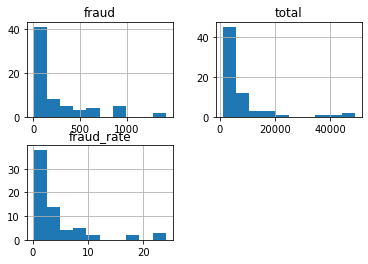

In [835]:
fraud_rate_calc("card2").hist()

In [50]:
fraud_rate_calc("card6")

fraud   total  fraud_rate
credit   9950  148986         6.7
debit   10674  439938         2.4

In [51]:
fraud_rate_calc("card4")

fraud   total  fraud_rate
discover            514    6651         7.7
visa              13373  384767         3.5
mastercard         6496  189217         3.4
american express    239    8328         2.9

In [52]:
fraud_rate_calc("ProductCD")

fraud   total  fraud_rate
C   8008   68519        11.7
S    686   11628         5.9
H   1574   33024         4.8
R   1426   37699         3.8
W   8969  439670         2.0

In [53]:
len(transaction["card1"].unique())

13553

In [54]:
fraud_rate_calc("card1")

fraud  total  fraud_rate
9026     397   2076        19.1
8755     199   1110        17.9
9633     742   4158        17.8
2256     235   1343        17.5
16062    144   1013        14.2
15063    319   2522        12.6
9002     121   1060        11.4
5812     314   2818        11.1
13832    196   2062         9.5
11201    117   1379         8.5
4461     199   2686         7.4
2616     314   4410         7.1
9803     106   1538         6.9
3154     286   4614         6.2
6170      68   1094         6.2
10486    141   2505         5.6
2455      89   1799         4.9
7585     263   5334         4.9
16075    182   3748         4.9
9300      56   1186         4.7
1893      75   1651         4.5
7664     127   2792         4.5
15885    444  10361         4.3
6019     294   6771         4.3
15066    313   7945         3.9
10057    122   3166         3.9
10616    202   5172         3.9
5033     101   2604         3.9
6174      42   1112         3.8
1675      67   1790         3.7
9500     528  14162         3.7
18268     39   1130         3.5
16136     71   2069         3.4
8695      39   1147         3.4
1724      51   1567         3.3
12932     64   1998         3.2
13108     30   1014         3.0
3682      40   1364         2.9
11839     56   1940         2.9
7508      96   3490         2.8
12695    201   7091         2.8
3821      46   1681         2.7
17188    278  10344         2.7
7826      77   3006         2.6
7207      68   2578         2.6
13780     25   1008         2.5
4272      27   1116         2.4
16659     68   2988         2.3
11106     23   1060         2.2
14290     38   1767         2.2
12501     68   3152         2.2
1342      29   1321         2.2
12544    146   6773         2.2
9175      23   1167         2.0
7861      56   2774         2.0
1444      39   1964         2.0
17400     28   1461         1.9
1939      23   1219         1.9
10023     43   2428         1.8
2772      34   1898         1.8
7815      41   2411         1.7
9480      18   1051         1.7
12469     22   1267         1.7
16132     64   3929         1.6
15484     20   1277         1.6
8406      17   1085         1.6
8528      24   1523         1.6
15986     15   1024         1.5
9112      35   2364         1.5
17055     25   1677         1.5
11157     26   1722         1.5
18132     59   4209         1.4
12839     70   5129         1.4
13249     21   1492         1.4
2884      52   3873         1.3
2392      19   1509         1.3
16255     15   1140         1.3
11207     43   3693         1.2
2803      73   6141         1.2
4806      24   2067         1.2
15497     43   3977         1.1
17131     17   1587         1.1
17399     22   1916         1.1
15775     15   1503         1.0
18018     15   1569         1.0
10112     35   3560         1.0
9992      13   1257         1.0
10447     10   1019         1.0
4436      17   1947         0.9
12577     27   2891         0.9
4663       9   1108         0.8
7919     112  14932         0.8
13481      8   1027         0.8
15651     12   1429         0.8
8320      22   2632         0.8
7676      13   2038         0.6
18249      7   1307         0.5
12686      7   1308         0.5
1974       7   1591         0.4
6550       5   1183         0.4
6530       8   2714         0.3
10989      3   1085         0.3
16560      7   2080         0.3

array([[<AxesSubplot:title={'center':'fraud'}>,
        <AxesSubplot:title={'center':'total'}>],
       [<AxesSubplot:title={'center':'fraud_rate'}>, <AxesSubplot:>]],
      dtype=object)

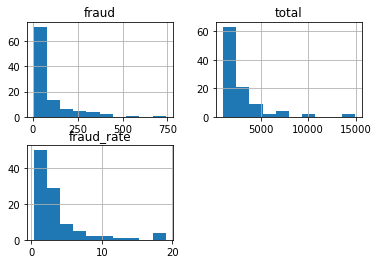

In [834]:
fraud_rate_calc("card1").hist()

In [520]:
s=fraud_rate_calc("card1").loc[:,'fraud_rate']>3.0
s[s].index.values

array([ 9026,  8755,  9633,  2256, 16062, 15063,  9002,  5812, 13832,
       11201,  4461,  2616,  9803,  3154,  6170, 10486,  2455,  7585,
       16075,  9300,  1893,  7664, 15885,  6019, 15066, 10057, 10616,
        5033,  6174,  1675,  9500, 18268, 16136,  8695,  1724, 12932])

In [55]:
transaction["addr1"].describe()

count    524834.000000
mean        290.733794
std         101.741072
min         100.000000
25%         204.000000
50%         299.000000
75%         330.000000
max         540.000000
Name: addr1, dtype: float64

<AxesSubplot:>

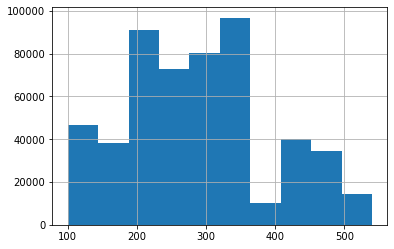

In [56]:
transaction["addr1"].hist()

In [57]:
len(transaction["addr1"].unique())

333

<AxesSubplot:>

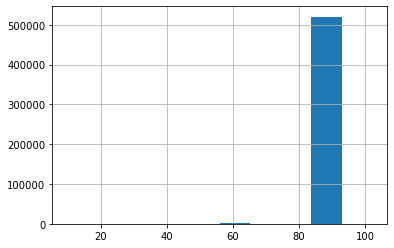

In [58]:
transaction["addr2"].hist()

In [59]:
len(transaction["addr2"].unique())


75

In [163]:
sum(transaction["addr2"].notna())

524834

In [60]:
transaction["addr2"].value_counts()

87.0     520481
60.0       3084
96.0        638
32.0         91
65.0         82
16.0         55
31.0         47
19.0         33
26.0         25
27.0         20
59.0         17
69.0         17
34.0         16
43.0         12
98.0         11
29.0         11
102.0        11
68.0         10
57.0         10
78.0          8
10.0          8
17.0          7
71.0          7
13.0          7
54.0          6
72.0          6
88.0          5
52.0          5
73.0          5
21.0          5
28.0          4
30.0          4
62.0          4
101.0         4
48.0          4
47.0          4
51.0          4
61.0          3
18.0          3
46.0          3
40.0          3
44.0          3
39.0          3
38.0          3
24.0          3
20.0          3
74.0          3
92.0          2
36.0          2
23.0          2
76.0          2
86.0          2
100.0         2
63.0          2
97.0          2
66.0          2
77.0          1
84.0          1
35.0          1
22.0          1
94.0          1
93.0          1
15.0    

In [61]:
fraud_rate_calc("addr1")

fraud  total  fraud_rate
122.0    117   1617         7.2
308.0     83   1279         6.5
324.0    112   2173         5.2
203.0    155   3808         4.1
226.0    189   4867         3.9
269.0    226   6404         3.5
170.0     68   2001         3.4
512.0    284   8268         3.4
420.0    117   3581         3.3
476.0    300   9478         3.2
498.0    150   4744         3.2
330.0    840  26287         3.2
177.0    142   4674         3.0
384.0     48   1670         2.9
231.0    218   7605         2.9
272.0    576  20141         2.9
337.0    439  15149         2.9
428.0     40   1425         2.8
220.0    137   5041         2.7
204.0   1120  42020         2.7
441.0    533  20827         2.6
225.0    133   5323         2.5
325.0   1087  42751         2.5
123.0    398  16105         2.5
126.0    386  15243         2.5
472.0    213   8478         2.5
158.0     38   1562         2.4
469.0     72   2940         2.4
181.0    298  13856         2.2
251.0    116   5216         2.2
299.0    985  46335         2.1
433.0    160   7831         2.0
310.0    167   8486         2.0
485.0    134   6816         2.0
110.0     64   3220         2.0
327.0    164   8425         1.9
387.0    157   8187         1.9
253.0     20   1058         1.9
315.0    411  23078         1.8
343.0     31   1734         1.8
264.0    728  39870         1.8
191.0    249  14979         1.7
184.0    206  15160         1.4
436.0     41   3169         1.3
143.0    124   9806         1.3
205.0     64   5725         1.1
194.0     17   1572         1.1
444.0     16   2033         0.8
494.0     40   5065         0.8

array([[<AxesSubplot:title={'center':'fraud'}>,
        <AxesSubplot:title={'center':'total'}>],
       [<AxesSubplot:title={'center':'fraud_rate'}>, <AxesSubplot:>]],
      dtype=object)

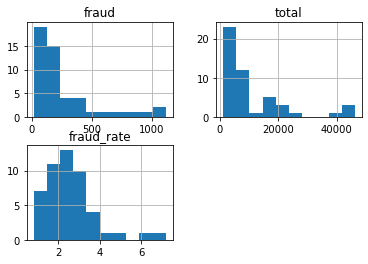

In [833]:
fraud_rate_calc("addr1").hist()

In [853]:
fraud_rate_calc("addr2",500)

fraud   total  fraud_rate
96.0     89     638        13.9
60.0    279    3084         9.0
87.0  12477  520481         2.4

In [229]:
tmp=list(transaction.groupby(['addr2', 'addr1']).size().index)
tmp1,tmp2=zip(*tmp)
tmp3=np.concatenate((np.reshape(tmp1,(-1,1)),np.reshape(tmp2,(-1,1))),axis=1)
tmp4 = pd.DataFrame(tmp3,columns=['addr2','addr1'])
tmp4.index=range(1,tmp4.shape[0]+1,1)
tmp5=transaction.groupby(['addr2', 'addr1']).size()
tmp5.index=range(1,tmp5.shape[0]+1,1)
tmp5.name="Count"
tmp7=transaction.groupby(['addr2', 'addr1']).sum('isFraud').loc[:,'isFraud']
tmp7.index=range(1,tmp7.shape[0]+1,1)
tmp6=pd.concat([tmp4,tmp5,tmp7],axis=1)
tmp6['fraud_rate']=round(tmp6['isFraud']/tmp6['Count']*100,1)
tmp6

addr2  addr1  Count  isFraud  fraud_rate
1     10.0  296.0      8        8       100.0
2     13.0  312.0      1        0         0.0
3     13.0  430.0      5        0         0.0
4     13.0  451.0      1        0         0.0
5     14.0  101.0      1        0         0.0
6     15.0  164.0      1        0         0.0
7     16.0  111.0      1        0         0.0
8     16.0  152.0      7        0         0.0
9     16.0  219.0      1        0         0.0
10    16.0  261.0      1        0         0.0
11    16.0  296.0     14        0         0.0
12    16.0  307.0      4        0         0.0
13    16.0  324.0      1        0         0.0
14    16.0  330.0      1        0         0.0
15    16.0  333.0      1        0         0.0
16    16.0  341.0      3        0         0.0
17    16.0  416.0      1        0         0.0
18    16.0  425.0      1        0         0.0
19    16.0  464.0      1        0         0.0
20    16.0  482.0      6        0         0.0
21    16.0  500.0      2        0         0.0
22    16.0  504.0      9        0         0.0
23    16.0  505.0      1        0         0.0
24    17.0  296.0      7        0         0.0
25    18.0  195.0      1        0         0.0
26    18.0  296.0      2        0         0.0
27    19.0  148.0      2        0         0.0
28    19.0  296.0     22        0         0.0
29    19.0  403.0      3        0         0.0
30    19.0  457.0      1        0         0.0
31    19.0  477.0      3        0         0.0
32    19.0  512.0      1        0         0.0
33    19.0  516.0      1        0         0.0
34    20.0  296.0      3        0         0.0
35    21.0  360.0      4        0         0.0
36    21.0  389.0      1        0         0.0
37    22.0  111.0      1        0         0.0
38    23.0  296.0      2        0         0.0
39    24.0  211.0      1        0         0.0
40    24.0  262.0      1        0         0.0
41    24.0  283.0      1        0         0.0
42    25.0  434.0      1        0         0.0
43    26.0  183.0      1        0         0.0
44    26.0  190.0      1        0         0.0
45    26.0  200.0      1        0         0.0
46    26.0  214.0      2        0         0.0
47    26.0  296.0      5        0         0.0
48    26.0  345.0      4        0         0.0
49    26.0  371.0      8        0         0.0
50    26.0  488.0      1        0         0.0
51    26.0  513.0      2        0         0.0
52    27.0  122.0      5        0         0.0
53    27.0  151.0      1        0         0.0
54    27.0  226.0      1        0         0.0
55    27.0  296.0      1        0         0.0
56    27.0  299.0      4        0         0.0
57    27.0  343.0      1        0         0.0
58    27.0  441.0      1        0         0.0
59    27.0  469.0      2        0         0.0
60    27.0  512.0      4        0         0.0
61    28.0  296.0      4        0         0.0
62    29.0  112.0      2        0         0.0
63    29.0  296.0      9        1        11.1
64    30.0  292.0      1        0         0.0
65    30.0  296.0      3        0         0.0
66    31.0  100.0     26        0         0.0
67    31.0  163.0      1        0         0.0
68    31.0  172.0      3        0         0.0
69    31.0  235.0      1        0         0.0
70    31.0  248.0      1        0         0.0
71    31.0  284.0      2        0         0.0
72    31.0  296.0      6        0         0.0
73    31.0  306.0      1        0         0.0
74    31.0  331.0      1        0         0.0
75    31.0  382.0      1        0         0.0
76    31.0  456.0      3        0         0.0
77    31.0  489.0      1        0         0.0
78    32.0  119.0      3        0         0.0
79    32.0  123.0      2        0         0.0
80    32.0  129.0      1        0         0.0
81    32.0  145.0      3        0         0.0
82    32.0  154.0     13        0         0.0
83    32.0  217.0      1        0         0.0
84    32.0  218.0      6        0         0.0
85    32.0  296.0     59        6        10.2
86    32.0  395.0      1        0         0.0
87 

In [232]:
sum(transaction.loc[transaction["addr1"].notna(),"isFraud"])

12922

In [233]:
sum(transaction.loc[:,"isFraud"])

20663

In [610]:
# tmp7=transaction.groupby(['addr2', 'addr1']).sum('isFraud').loc[:,'isFraud']
# tmp7.index=range(1,tmp7.shape[0]+1,1)
tmp7.sort_values(ascending=False)

addr2  addr1
87.0   204.0    1120
       325.0    1087
       299.0     985
       330.0     840
       264.0     728
       272.0     576
       441.0     533
       337.0     439
       315.0     411
       123.0     398
       126.0     386
       476.0     300
       181.0     298
       512.0     284
       191.0     249
       269.0     226
       231.0     218
       472.0     213
       184.0     206
       226.0     189
       310.0     167
       327.0     164
       433.0     160
       387.0     157
       203.0     155
       498.0     150
       177.0     142
       220.0     137
       485.0     134
       225.0     133
       143.0     124
       122.0     117
       420.0     117
       251.0     116
       324.0     112
       308.0      83
60.0   161.0      82
87.0   469.0      72
       170.0      68
       110.0      64
       205.0      64
96.0   536.0      50
87.0   384.0      48
65.0   296.0      44
60.0   465.0      42
87.0   436.0      41
       428.0      40


In [63]:
len(transaction["P_emaildomain"].unique())

60

In [64]:
transaction["P_emaildomain"].value_counts()

gmail.com           228355
yahoo.com           100934
hotmail.com          45250
anonymous.com        36998
aol.com              28289
comcast.net           7888
icloud.com            6267
outlook.com           5096
msn.com               4092
att.net               4033
live.com              3041
sbcglobal.net         2970
verizon.net           2705
ymail.com             2396
bellsouth.net         1909
yahoo.com.mx          1543
me.com                1522
cox.net               1393
optonline.net         1011
charter.net            816
live.com.mx            749
rocketmail.com         664
mail.com               559
earthlink.net          514
gmail                  496
outlook.es             438
mac.com                436
juno.com               322
aim.com                315
windstream.net         305
hotmail.es             305
roadrunner.com         305
hotmail.fr             295
frontier.com           280
embarqmail.com         260
web.de                 240
netzero.com            230
t

In [65]:
fraud_rate_calc("P_emaildomain")

fraud   total  fraud_rate
outlook.com      482    5096         9.5
hotmail.com     2396   45250         5.3
gmail.com       9943  228355         4.4
icloud.com       197    6267         3.1
comcast.net      246    7888         3.1
live.com          84    3041         2.8
bellsouth.net     53    1909         2.8
anonymous.com    859   36998         2.3
yahoo.com       2297  100934         2.3
msn.com           90    4092         2.2
aol.com          617   28289         2.2
cox.net           29    1393         2.1
ymail.com         50    2396         2.1
me.com            27    1522         1.8
optonline.net     17    1011         1.7
yahoo.com.mx      16    1543         1.0
verizon.net       22    2705         0.8
att.net           30    4033         0.7
sbcglobal.net     12    2970         0.4

In [66]:
transaction["R_emaildomain"].value_counts()

gmail.com           57147
hotmail.com         27509
anonymous.com       20529
yahoo.com           11842
aol.com              3701
outlook.com          2507
comcast.net          1812
yahoo.com.mx         1508
icloud.com           1398
msn.com               852
live.com              762
live.com.mx           754
verizon.net           620
me.com                556
sbcglobal.net         552
cox.net               459
outlook.es            433
att.net               430
bellsouth.net         422
hotmail.fr            293
hotmail.es            292
web.de                237
mac.com               218
ymail.com             207
prodigy.net.mx        207
optonline.net         187
gmx.de                147
yahoo.fr              137
charter.net           127
mail.com              122
hotmail.co.uk         105
gmail                  95
earthlink.net          79
yahoo.de               75
rocketmail.com         69
embarqmail.com         68
scranton.edu           63
yahoo.es               57
live.fr     

In [67]:
fraud_rate_calc("R_emaildomain")

fraud  total  fraud_rate
outlook.com      414   2507        16.5
icloud.com       180   1398        12.9
gmail.com       6811  57147        11.9
hotmail.com     2140  27509         7.8
yahoo.com        610  11842         5.2
aol.com          129   3701         3.5
anonymous.com    598  20529         2.9
comcast.net       21   1812         1.2
yahoo.com.mx      16   1508         1.1

In [246]:
sum(transaction.loc[transaction["P_emaildomain"].notna(),"isFraud"])

17873

In [247]:
17873/496084


0.03602817264818055

In [68]:
len(transaction["R_emaildomain"].unique())

61

In [727]:
np.sum(transaction.loc[transaction["R_emaildomain"].notna(),"isFraud"])

11227

In [728]:
np.sum(transaction.loc[transaction["R_emaildomain"].isna(),"isFraud"])

9436

In [730]:
np.sum(transaction["R_emaildomain"].notna())

137291

In [731]:
np.sum(transaction["R_emaildomain"].isna())

453249

In [732]:
9436/453249*100

2.081857875031164

In [733]:
11227/137291*100

8.177520740616647

In [70]:
sum(transaction["P_emaildomain"].notna())

496084

In [71]:
sum(transaction["addr1"].notna())

524834

In [72]:
sum(transaction["addr2"].notna())

524834

In [73]:
sum(transaction["card1"].notna())

590540

In [74]:
sum(transaction["card2"].notna())

581607

In [75]:
sum(transaction["card3"].notna())

588975

In [76]:
sum(transaction["card4"].notna())

588963

In [77]:
sum(transaction["card5"].notna())

586281

In [78]:
sum(transaction["card6"].notna())

588969

In [79]:
sum(transaction["ProductCD"].notna())

590540

In [80]:
sum(transaction["dist1"].notna())

238269

In [81]:
transaction["dist1"].describe()


count    238269.000000
mean        118.502180
std         371.872026
min           0.000000
25%           3.000000
50%           8.000000
75%          24.000000
max       10286.000000
Name: dist1, dtype: float64

<AxesSubplot:>

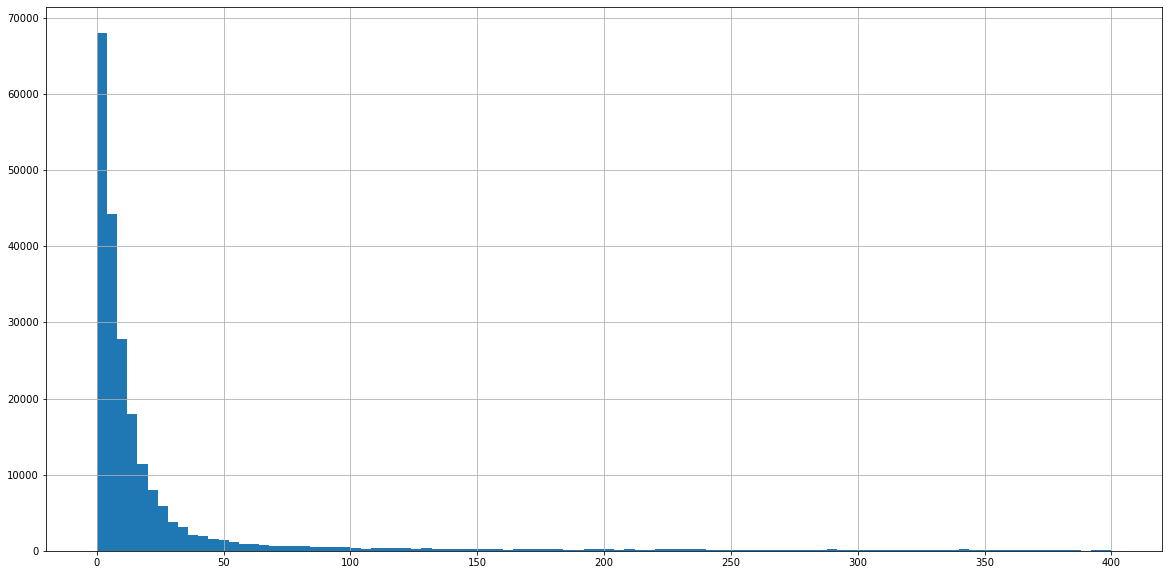

In [677]:
fig = plt.figure(figsize=(20,10))
transaction.loc[transaction["dist1"]<=400,"dist1"].hist(bins=100,range=(0,400))


In [82]:
sum(transaction["dist2"].notna())

37627

In [83]:
transaction["dist2"].describe()

count    37627.000000
mean       231.855423
std        529.053494
min          0.000000
25%          7.000000
50%         37.000000
75%        206.000000
max      11623.000000
Name: dist2, dtype: float64

In [234]:
sum(transaction.loc[transaction["dist1"].notna(),"isFraud"])

4755

In [245]:
15908/352271


0.04515841497029276

In [114]:

tmp1=range(1,15,1)
tmp2= map(lambda x: str(x), tmp1)
tmp5=pd.DataFrame([])
for i in tmp2:
    tmp3=['C',i]
    tmp4=(''.join(tmp3))
    tmp5=pd.concat([tmp5,pd.DataFrame(transaction[tmp4].value_counts()[:9])],axis=1)
tmp5

C1        C2        C3        C4        C5        C6        C7  \
0.0        NaN       NaN  588111.0  451883.0  372435.0   49066.0  523142.0   
1.0   316791.0  316261.0    2137.0  111817.0  122883.0  341552.0   51966.0   
2.0   105071.0  103948.0     180.0   12994.0   34776.0   86103.0    7314.0   
3.0    51315.0   51770.0      58.0    4949.0   13189.0   35490.0    2033.0   
4.0    28845.0   28251.0       7.0    1902.0    6828.0   17805.0    1109.0   
5.0    17922.0   16971.0       NaN     851.0    3763.0   10187.0     481.0   
6.0    10567.0   10682.0       NaN     597.0    2837.0    6048.0     409.0   
7.0     7263.0    7382.0       NaN     372.0    1906.0    3934.0     267.0   
8.0     5072.0    5105.0       NaN       NaN    1443.0    3048.0       NaN   
9.0     3612.0    3750.0       5.0     273.0    1076.0    2335.0     233.0   
16.0       NaN       NaN       6.0       NaN       NaN       NaN       NaN   

            C8        C9       C10       C11       C12       C13       C14  
0.0   447667.0  183795.0  453442.0    1864.0  489199.0   35460.0   35947.0  
1.0   104994.0  228938.0  100231.0  389692.0   76661.0  199337.0  320189.0  
2.0    15927.0   77829.0   14938.0   89677.0   12242.0   57616.0   93843.0  
3.0     5493.0   32505.0    6417.0   34463.0    4185.0   33033.0   44471.0  
4.0     2817.0   16196.0    2836.0   16051.0    1716.0   23704.0   25390.0  
5.0     1721.0    8648.0    1806.0    9972.0    1085.0   18355.0   15655.0  
6.0     1774.0    5760.0    1286.0    5966.0     629.0   15127.0    8563.0  
7.0      988.0    3529.0     817.0    3663.0     393.0   13001.0    5030.0  
8.0     1790.0    2548.0     627.0    2892.0     262.0   11424.0    3471.0  
9.0      718.0    1871.0     553.0    1805.0     177.0   10189.0    2651.0  
16.0       NaN       NaN       NaN       NaN       NaN       NaN       NaN

In [138]:
def create_dist_table(z,m,n=10):
    tmp1=range(1,m+1,1)
    tmp2= map(lambda x: str(x), tmp1)
    tmp5=pd.DataFrame([])
    for i in tmp2:
        tmp3=[z,i]
        tmp4=(''.join(tmp3))
        tmp6=pd.DataFrame(transaction[tmp4].value_counts()).iloc[:n,:]
        tmp5=pd.concat([tmp5,tmp6],axis=1)
    return tmp5

In [139]:
create_dist_table('C',14)

C1        C2        C3        C4        C5        C6        C7  \
0.0        NaN       NaN  588111.0  451883.0  372435.0   49066.0  523142.0   
1.0   316791.0  316261.0    2137.0  111817.0  122883.0  341552.0   51966.0   
2.0   105071.0  103948.0     180.0   12994.0   34776.0   86103.0    7314.0   
3.0    51315.0   51770.0      58.0    4949.0   13189.0   35490.0    2033.0   
4.0    28845.0   28251.0       7.0    1902.0    6828.0   17805.0    1109.0   
5.0    17922.0   16971.0       3.0     851.0    3763.0   10187.0     481.0   
6.0    10567.0   10682.0       NaN     597.0    2837.0    6048.0     409.0   
7.0     7263.0    7382.0       NaN     372.0    1906.0    3934.0     267.0   
8.0     5072.0    5105.0       NaN       NaN    1443.0    3048.0       NaN   
9.0     3612.0    3750.0       5.0     273.0    1076.0    2335.0     233.0   
10.0    2904.0    2797.0       NaN     233.0       NaN       NaN     175.0   
11.0       NaN       NaN       5.0       NaN       NaN       NaN       NaN   
13.0       NaN       NaN       3.0       NaN       NaN       NaN       NaN   
16.0       NaN       NaN       6.0       NaN       NaN       NaN       NaN   

            C8        C9       C10       C11       C12       C13       C14  
0.0   447667.0  183795.0  453442.0    1864.0  489199.0   35460.0   35947.0  
1.0   104994.0  228938.0  100231.0  389692.0   76661.0  199337.0  320189.0  
2.0    15927.0   77829.0   14938.0   89677.0   12242.0   57616.0   93843.0  
3.0     5493.0   32505.0    6417.0   34463.0    4185.0   33033.0   44471.0  
4.0     2817.0   16196.0    2836.0   16051.0    1716.0   23704.0   25390.0  
5.0     1721.0    8648.0    1806.0    9972.0    1085.0   18355.0   15655.0  
6.0     1774.0    5760.0    1286.0    5966.0     629.0   15127.0    8563.0  
7.0      988.0    3529.0     817.0    3663.0     393.0   13001.0    5030.0  
8.0     1790.0    2548.0     627.0    2892.0     262.0   11424.0    3471.0  
9.0      718.0    1871.0     553.0    1805.0     177.0   10189.0    2651.0  
10.0       NaN       NaN       NaN       NaN       NaN       NaN       NaN  
11.0       NaN       NaN       NaN       NaN       NaN       NaN       NaN  
13.0       NaN       NaN       NaN       NaN       NaN       NaN       NaN  
16.0       NaN       NaN       NaN       NaN       NaN       NaN       NaN

In [140]:
create_dist_table('D',15)

D1       D2       D3        D4       D5       D6       D7  \
0.000000    280130.0  15124.0  73094.0  166571.0  65377.0  45782.0  21135.0   
0.083333         NaN      NaN      NaN       NaN      NaN      NaN      NaN   
0.125000         NaN      NaN      NaN       NaN      NaN      NaN      NaN   
0.625000         NaN      NaN      NaN       NaN      NaN      NaN      NaN   
0.666666         NaN      NaN      NaN       NaN      NaN      NaN      NaN   
0.708333         NaN      NaN      NaN       NaN      NaN      NaN      NaN   
0.750000         NaN      NaN      NaN       NaN      NaN      NaN      NaN   
0.791666         NaN      NaN      NaN       NaN      NaN      NaN      NaN   
0.833333         NaN      NaN      NaN       NaN      NaN      NaN      NaN   
0.875000         NaN      NaN      NaN       NaN      NaN      NaN      NaN   
0.916666         NaN      NaN      NaN       NaN      NaN      NaN      NaN   
0.958333         NaN      NaN      NaN       NaN      NaN      NaN      NaN   
1.000000      8634.0   6654.0  21258.0    5315.0  15282.0   1588.0   1717.0   
2.000000      4969.0   4454.0  13789.0    3385.0  10244.0    855.0    998.0   
3.000000      3954.0   3677.0  10786.0    2572.0   7987.0    642.0    791.0   
4.000000      3570.0   3344.0   9552.0    2354.0   7176.0    579.0    601.0   
5.000000      3076.0   2972.0   8800.0    2172.0   6696.0    436.0    513.0   
6.000000      3164.0   3068.0   9245.0    2038.0   6907.0    353.0    435.0   
7.000000      3455.0   3331.0  13320.0    2317.0   9734.0    380.0    606.0   
8.000000      2637.0   2593.0   8092.0    1780.0   6140.0      NaN    387.0   
9.000000         NaN      NaN      NaN       NaN      NaN      NaN    300.0   
14.000000     2979.0   2919.0   9547.0    2117.0   7340.0      NaN      NaN   
19.000000        NaN      NaN      NaN       NaN      NaN      NaN      NaN   
26.000000        NaN      NaN      NaN       NaN      NaN      NaN      NaN   
28.000000        NaN      NaN      NaN       NaN      NaN      NaN      NaN   
249.000000       NaN      NaN      NaN       NaN      NaN    344.0      NaN   
256.000000       NaN      NaN      NaN       NaN      NaN    895.0      NaN   

                D8      D9       D10       D11      D12      D13      D14  \
0.000000       NaN  4190.0  221930.0  112281.0  42756.0  48840.0  45266.0   
0.083333    1118.0     NaN       NaN       NaN      NaN      NaN      NaN   
0.125000    1028.0     NaN       NaN       NaN      NaN      NaN      NaN   
0.625000       NaN  4380.0       NaN       NaN      NaN      NaN      NaN   
0.666666    1097.0  5069.0       NaN       NaN      NaN      NaN      NaN   
0.708333    1175.0  5132.0       NaN       NaN      NaN      NaN      NaN   
0.750000    1248.0  5147.0       NaN       NaN      NaN      NaN      NaN   
0.791666    1351.0  5388.0       NaN       NaN      NaN      NaN      NaN   
0.833333    1327.0  5273.0       NaN       NaN      NaN      NaN      NaN   
0.875000    1304.0  4857.0       NaN       NaN      NaN      NaN      NaN   
0.916666    1259.0  4694.0       NaN       NaN      NaN      NaN      NaN   
0.958333    1300.0  4411.0       NaN       NaN      NaN      NaN      NaN   
1.000000       NaN     NaN    5186.0    3165.0   1526.0   1097.0   1105.0   
2.000000       NaN     NaN    3482.0    2020.0    818.0    623.0    495.0   
3.000000       NaN     NaN    2756.0    1642.0    634.0    476.0    307.0   
4.000000       NaN     NaN    2344.0    1449.0    564.0    366.0    260.0   
5.000000       NaN     NaN    2377.0    1424.0    418.0    316.0    210.0   
6.000000       NaN     NaN    2303.0    1440.0    341.0    262.0    183.0   
7.000000       NaN     NaN    2740.0    1639.0    373.0    303.0    233.0   
8.000000       NaN     NaN       NaN       NaN    273.0      NaN      NaN   
9.000000       NaN     NaN       NaN       NaN    249.0      NaN      NaN   
14.000000      NaN     NaN    2512.0    1496.0      NaN      NaN      NaN   
19.000000      NaN     NaN       N

In [141]:
create_dist_table('M',9)

M1        M2        M3        M4        M5        M6        M7  \
T   319415.0  285468.0  251731.0       NaN  107567.0  193324.0   32901.0   
F       25.0   33972.0   67709.0       NaN  132491.0  227856.0  211374.0   
M0       NaN       NaN       NaN  196405.0       NaN       NaN       NaN   
M2       NaN       NaN       NaN   59865.0       NaN       NaN       NaN   
M1       NaN       NaN       NaN   52826.0       NaN       NaN       NaN   

          M8        M9  
T    89037.0  205656.0  
F   155251.0   38632.0  
M0       NaN       NaN  
M2       NaN       NaN  
M1       NaN       NaN

In [89]:
transaction["C1"].value_counts()

1.0       316791
2.0       105071
3.0        51315
4.0        28845
5.0        17922
6.0        10567
7.0         7263
8.0         5072
9.0         3612
10.0        2904
11.0        2167
12.0        1965
13.0        1460
14.0        1116
15.0         858
16.0         729
17.0         715
18.0         578
19.0         494
0.0          494
20.0         437
21.0         375
22.0         369
24.0         323
117.0        322
110.0        316
111.0        313
121.0        298
126.0        291
123.0        291
25.0         287
127.0        277
125.0        277
118.0        275
116.0        274
114.0        274
101.0        273
109.0        272
120.0        271
113.0        271
130.0        266
129.0        266
102.0        264
128.0        261
104.0        258
23.0         257
107.0        257
108.0        256
119.0        255
135.0        248
134.0        248
95.0         247
122.0        247
105.0        242
138.0        242
142.0        241
124.0        241
139.0        240
100.0        2

In [90]:
transaction["C2"].value_counts()

1.0       316261
2.0       103948
3.0        51770
4.0        28251
5.0        16971
6.0        10682
7.0         7382
8.0         5105
9.0         3750
10.0        2797
11.0        2435
12.0        2057
13.0        1515
14.0        1364
15.0        1031
16.0         878
17.0         695
18.0         602
19.0         599
20.0         579
0.0          443
21.0         401
23.0         351
101.0        333
94.0         329
104.0        327
102.0        320
111.0        315
100.0        315
97.0         313
106.0        311
98.0         311
115.0        306
24.0         304
105.0        300
107.0        299
113.0        298
95.0         296
114.0        295
109.0        285
119.0        285
96.0         284
112.0        283
116.0        279
117.0        275
120.0        272
99.0         269
90.0         269
110.0        268
122.0        267
89.0         266
22.0         266
123.0        265
108.0        265
118.0        264
26.0         255
126.0        255
121.0        253
103.0        2

In [91]:
transaction["C3"].value_counts()

0.0     588111
1.0       2137
2.0        180
3.0         58
4.0          7
16.0         6
9.0          5
11.0         5
5.0          3
13.0         3
14.0         3
10.0         2
8.0          2
12.0         2
15.0         2
7.0          2
17.0         2
6.0          1
19.0         1
20.0         1
21.0         1
22.0         1
23.0         1
24.0         1
25.0         1
26.0         1
18.0         1
Name: C3, dtype: int64

In [92]:
transaction["C4"].value_counts()

0.0       451883
1.0       111817
2.0        12994
3.0         4949
4.0         1902
5.0          851
6.0          597
7.0          372
9.0          273
10.0         233
8.0          226
12.0         175
11.0         167
16.0         116
15.0         116
17.0         113
13.0         109
14.0          91
20.0          81
18.0          71
52.0          63
21.0          60
19.0          58
30.0          49
83.0          43
24.0          41
70.0          40
51.0          39
23.0          35
39.0          35
91.0          35
22.0          32
92.0          32
88.0          30
35.0          30
47.0          29
37.0          27
34.0          26
25.0          24
55.0          23
31.0          23
87.0          22
58.0          22
28.0          22
41.0          21
29.0          20
84.0          19
75.0          19
46.0          18
57.0          18
54.0          18
49.0          17
33.0          17
56.0          16
881.0         15
48.0          15
82.0          15
50.0          15
36.0          

In [93]:
transaction["C5"].value_counts()

0.0      372435
1.0      122883
2.0       34776
3.0       13189
4.0        6828
5.0        3763
6.0        2837
7.0        1906
8.0        1443
9.0        1076
10.0        976
11.0        672
12.0        639
13.0        583
15.0        452
14.0        420
16.0        413
117.0       279
17.0        277
99.0        274
116.0       273
102.0       263
121.0       257
108.0       255
107.0       254
98.0        253
118.0       252
113.0       249
19.0        249
100.0       248
104.0       247
18.0        245
105.0       241
111.0       241
110.0       241
119.0       240
103.0       238
21.0        236
109.0       235
112.0       233
114.0       232
122.0       229
106.0       228
120.0       226
22.0        226
96.0        223
127.0       223
123.0       222
130.0       221
115.0       219
132.0       218
97.0        217
94.0        216
128.0       215
23.0        210
124.0       207
136.0       206
26.0        203
101.0       200
131.0       196
138.0       195
129.0       192
133.0   

In [94]:
transaction["C6"].value_counts()

1.0       341552
2.0        86103
0.0        49066
3.0        35490
4.0        17805
5.0        10187
6.0         6048
7.0         3934
8.0         3048
9.0         2335
10.0        1817
11.0        1271
13.0         896
12.0         772
15.0         590
16.0         571
14.0         567
88.0         436
82.0         435
81.0         435
79.0         434
84.0         422
86.0         407
83.0         407
91.0         406
17.0         406
87.0         378
80.0         375
92.0         372
77.0         365
94.0         364
90.0         355
78.0         352
89.0         340
85.0         338
97.0         336
98.0         334
73.0         334
76.0         332
95.0         329
96.0         318
93.0         318
18.0         317
103.0        308
74.0         306
72.0         302
19.0         300
20.0         292
102.0        287
100.0        286
99.0         282
75.0         281
71.0         279
101.0        273
68.0         269
69.0         264
104.0        255
107.0        254
21.0         2

In [95]:
transaction["C7"].value_counts()

0.0       523142
1.0        51966
2.0         7314
3.0         2033
4.0         1109
5.0          481
6.0          409
7.0          267
9.0          233
10.0         175
8.0          173
11.0         118
16.0         108
17.0         101
15.0          85
13.0          83
14.0          70
20.0          68
52.0          63
18.0          57
12.0          56
19.0          47
30.0          45
83.0          42
70.0          40
92.0          40
51.0          37
35.0          35
21.0          34
24.0          33
88.0          31
91.0          28
39.0          27
47.0          26
22.0          25
37.0          25
87.0          24
58.0          24
84.0          23
55.0          23
29.0          22
23.0          21
34.0          21
75.0          19
54.0          18
46.0          17
25.0          17
38.0          17
31.0          17
86.0          16
57.0          16
56.0          16
41.0          15
50.0          15
48.0          14
82.0          13
49.0          12
33.0          12
28.0          

In [96]:
transaction["C8"].value_counts()

0.0       447667
1.0       104994
2.0        15927
3.0         5493
4.0         2817
8.0         1790
6.0         1774
5.0         1721
7.0          988
9.0          718
10.0         475
11.0         330
12.0         318
16.0         253
13.0         249
17.0         216
15.0         204
14.0         190
19.0         143
18.0          97
22.0          83
21.0          71
20.0          67
36.0          61
27.0          58
23.0          57
24.0          57
121.0         57
41.0          51
35.0          49
122.0         48
132.0         48
26.0          48
28.0          47
120.0         45
25.0          40
66.0          39
29.0          37
33.0          36
40.0          34
37.0          33
478.0         32
44.0          32
137.0         28
31.0          28
38.0          27
30.0          27
32.0          27
42.0          27
43.0          26
34.0          25
39.0          22
488.0         22
117.0         21
72.0          21
61.0          20
67.0          20
494.0         20
480.0         

In [97]:
transaction["C9"].value_counts()

1.0      228938
0.0      183795
2.0       77829
3.0       32505
4.0       16196
5.0        8648
6.0        5760
7.0        3529
8.0        2548
9.0        1871
10.0       1229
11.0        945
12.0        706
13.0        564
14.0        513
73.0        451
72.0        447
78.0        425
81.0        423
15.0        415
74.0        412
71.0        409
82.0        409
68.0        403
83.0        400
70.0        392
80.0        389
77.0        384
86.0        382
69.0        382
87.0        376
79.0        375
65.0        370
84.0        354
85.0        353
76.0        353
75.0        344
64.0        344
66.0        343
88.0        339
67.0        326
62.0        318
89.0        317
60.0        304
91.0        304
63.0        301
90.0        294
94.0        292
93.0        291
16.0        286
92.0        281
61.0        278
58.0        277
59.0        276
98.0        268
96.0        266
97.0        265
55.0        264
56.0        246
17.0        245
95.0        242
19.0        232
99.0    

In [98]:
transaction["C10"].value_counts()

0.0       453442
1.0       100231
2.0        14938
3.0         6417
4.0         2836
5.0         1806
6.0         1286
7.0          817
8.0          627
9.0          553
10.0         420
11.0         392
13.0         308
12.0         295
14.0         237
15.0         212
16.0         182
19.0         148
17.0         137
20.0         135
18.0         127
24.0         104
26.0         100
23.0          86
49.0          85
112.0         84
21.0          83
33.0          70
27.0          69
47.0          69
29.0          68
32.0          65
109.0         65
46.0          63
25.0          63
28.0          62
39.0          58
22.0          56
30.0          54
34.0          53
35.0          52
54.0          51
45.0          51
37.0          51
31.0          51
36.0          50
53.0          48
43.0          45
50.0          42
44.0          42
86.0          38
48.0          35
113.0         35
412.0         32
110.0         32
427.0         30
108.0         29
40.0          28
423.0         

In [99]:
transaction["C11"].value_counts()

1.0       389692
2.0        89677
3.0        34463
4.0        16051
5.0         9972
6.0         5966
7.0         3663
8.0         2892
0.0         1864
9.0         1805
10.0        1634
11.0        1119
12.0         915
13.0         723
14.0         582
82.0         421
71.0         411
78.0         405
15.0         404
17.0         398
80.0         395
90.0         382
73.0         379
18.0         377
83.0         377
75.0         375
79.0         369
84.0         367
77.0         366
72.0         360
85.0         353
92.0         350
93.0         348
86.0         345
76.0         344
81.0         337
70.0         335
74.0         316
91.0         316
65.0         304
99.0         298
87.0         292
16.0         291
66.0         291
68.0         290
95.0         286
98.0         283
89.0         280
67.0         274
97.0         274
69.0         270
94.0         269
101.0        269
22.0         262
88.0         260
105.0        255
19.0         255
96.0         255
104.0        2

In [100]:
transaction["C12"].value_counts()

0.0       489199
1.0        76661
2.0        12242
3.0         4185
4.0         1716
5.0         1085
6.0          629
7.0          393
8.0          262
9.0          177
10.0         176
12.0         107
15.0         105
17.0         104
14.0         101
13.0          94
18.0          87
11.0          82
16.0          72
27.0          72
23.0          63
28.0          59
22.0          45
19.0          38
131.0         38
25.0          36
20.0          36
21.0          34
24.0          33
145.0         33
146.0         32
34.0          32
135.0         30
132.0         29
30.0          26
83.0          26
67.0          25
43.0          24
133.0         23
33.0          21
32.0          21
127.0         19
31.0          17
59.0          17
154.0         17
29.0          17
42.0          16
26.0          16
47.0          15
52.0          15
35.0          15
141.0         15
48.0          15
44.0          15
45.0          14
66.0          14
69.0          14
46.0          14
73.0          

In [101]:
transaction["C13"].value_counts()

1.0       199337
2.0        57616
0.0        35460
3.0        33033
4.0        23704
5.0        18355
6.0        15127
7.0        13001
8.0        11424
9.0        10189
10.0        9263
11.0        8591
12.0        8442
13.0        8032
14.0        6997
15.0        6254
16.0        5838
17.0        5398
18.0        4898
19.0        4503
20.0        4135
21.0        3865
22.0        3584
23.0        3429
24.0        3271
25.0        3056
26.0        2827
27.0        2692
28.0        2588
29.0        2556
30.0        2284
31.0        2096
32.0        1887
33.0        1744
34.0        1697
35.0        1598
36.0        1382
37.0        1379
38.0        1374
61.0        1329
39.0        1273
40.0        1165
42.0        1108
41.0        1090
43.0        1062
51.0        1053
44.0         975
45.0         906
46.0         892
47.0         852
49.0         795
48.0         763
50.0         745
52.0         741
53.0         720
54.0         597
55.0         560
57.0         535
56.0         5

In [102]:
transaction["C14"].value_counts()[:9]

1.0    320189
2.0     93843
3.0     44471
0.0     35947
4.0     25390
5.0     15655
6.0      8563
7.0      5030
8.0      3471
9.0      2651
Name: C14, dtype: int64

In [124]:
transaction["D1"].value_counts()[:20]

0.0     280130
1.0       8634
2.0       4969
3.0       3954
4.0       3570
7.0       3455
6.0       3164
5.0       3076
14.0      2979
8.0       2637
28.0      2634
9.0       2387
13.0      2369
42.0      2294
15.0      2222
11.0      2119
10.0      2115
12.0      2071
29.0      2039
21.0      2023
35.0      1964
16.0      1853
30.0      1812
27.0      1791
22.0      1715
20.0      1709
Name: D1, dtype: int64

In [135]:
pd.DataFrame(transaction["D8"].value_counts()).iloc[:20,:]

D8
0.791666  1351
0.833333  1327
0.875000  1304
0.958333  1300
0.916666  1259
0.750000  1248
0.708333  1175
0.083333  1118
0.666666  1097
0.125000  1028
0.041666   973
0.166666   877
0.000000   835
0.625000   815
0.208333   686
0.583333   677
0.250000   381
1.000000   373
0.541666   353
0.291666   267

In [235]:
trans = transaction.copy()

In [238]:
trans.columns[0:55]

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6',
       'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain',
       'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11',
       'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8',
       'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'M1', 'M2', 'M3', 'M4',
       'M5', 'M6', 'M7', 'M8', 'M9'],
      dtype='object')

In [239]:
trans.iloc[:,:55].head()

TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0        2987000        0          86400            68.5         W  13926   
1        2987001        0          86401            29.0         W   2755   
2        2987002        0          86469            59.0         W   4663   
3        2987003        0          86499            50.0         W  18132   
4        2987004        0          86506            50.0         H   4497   

   card2  card3       card4  card5   card6  addr1  addr2  dist1  dist2  \
0    NaN  150.0    discover  142.0  credit  315.0   87.0   19.0    NaN   
1  404.0  150.0  mastercard  102.0  credit  325.0   87.0    NaN    NaN   
2  490.0  150.0        visa  166.0   debit  330.0   87.0  287.0    NaN   
3  567.0  150.0  mastercard  117.0   debit  476.0   87.0    NaN    NaN   
4  514.0  150.0  mastercard  102.0  credit  420.0   87.0    NaN    NaN   

  P_emaildomain R_emaildomain   C1   C2   C3   C4   C5   C6   C7   C8   C9  \
0           NaN           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
1     gmail.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
2   outlook.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
3     yahoo.com           NaN  2.0  5.0  0.0  0.0  0.0  4.0  0.0  0.0  1.0   
4     gmail.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0   

   C10  C11  C12   C13  C14     D1     D2    D3    D4   D5  D6  D7  D8  D9  \
0  0.0  2.0  0.0   1.0  1.0   14.0    NaN  13.0   NaN  NaN NaN NaN NaN NaN   
1  0.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   0.0  NaN NaN NaN NaN NaN   
2  0.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   0.0  NaN NaN NaN NaN NaN   
3  0.0  1.0  0.0  25.0  1.0  112.0  112.0   0.0  94.0  0.0 NaN NaN NaN NaN   
4  1.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   NaN  NaN NaN NaN NaN NaN   

    D10    D11  D12  D13  D14    D15   M1   M2   M3   M4   M5   M6   M7   M8  \
0  13.0   13.0  NaN  NaN  NaN    0.0    T    T    T   M2    F    T  NaN  NaN   
1   0.0    NaN  NaN  NaN  NaN    0.0  NaN  NaN  NaN   M0    T    T  NaN  NaN   
2   0.0  315.0  NaN  NaN  NaN  315.0    T    T    T   M0    F    F    F    F   
3  84.0    NaN  NaN  NaN  NaN  111.0  NaN  NaN  NaN   M0    T    F  NaN  NaN   
4   NaN    NaN  NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

    M9  
0  NaN  
1  NaN  
2    F  
3  NaN  
4  NaN

In [240]:
trans=trans.iloc[:,:55]

In [242]:
trans.head()

TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0        2987000        0          86400            68.5         W  13926   
1        2987001        0          86401            29.0         W   2755   
2        2987002        0          86469            59.0         W   4663   
3        2987003        0          86499            50.0         W  18132   
4        2987004        0          86506            50.0         H   4497   

   card2  card3       card4  card5   card6  addr1  addr2  dist1  dist2  \
0    NaN  150.0    discover  142.0  credit  315.0   87.0   19.0    NaN   
1  404.0  150.0  mastercard  102.0  credit  325.0   87.0    NaN    NaN   
2  490.0  150.0        visa  166.0   debit  330.0   87.0  287.0    NaN   
3  567.0  150.0  mastercard  117.0   debit  476.0   87.0    NaN    NaN   
4  514.0  150.0  mastercard  102.0  credit  420.0   87.0    NaN    NaN   

  P_emaildomain R_emaildomain   C1   C2   C3   C4   C5   C6   C7   C8   C9  \
0           NaN           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
1     gmail.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
2   outlook.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
3     yahoo.com           NaN  2.0  5.0  0.0  0.0  0.0  4.0  0.0  0.0  1.0   
4     gmail.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0   

   C10  C11  C12   C13  C14     D1     D2    D3    D4   D5  D6  D7  D8  D9  \
0  0.0  2.0  0.0   1.0  1.0   14.0    NaN  13.0   NaN  NaN NaN NaN NaN NaN   
1  0.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   0.0  NaN NaN NaN NaN NaN   
2  0.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   0.0  NaN NaN NaN NaN NaN   
3  0.0  1.0  0.0  25.0  1.0  112.0  112.0   0.0  94.0  0.0 NaN NaN NaN NaN   
4  1.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   NaN  NaN NaN NaN NaN NaN   

    D10    D11  D12  D13  D14    D15   M1   M2   M3   M4   M5   M6   M7   M8  \
0  13.0   13.0  NaN  NaN  NaN    0.0    T    T    T   M2    F    T  NaN  NaN   
1   0.0    NaN  NaN  NaN  NaN    0.0  NaN  NaN  NaN   M0    T    T  NaN  NaN   
2   0.0  315.0  NaN  NaN  NaN  315.0    T    T    T   M0    F    F    F    F   
3  84.0    NaN  NaN  NaN  NaN  111.0  NaN  NaN  NaN   M0    T    F  NaN  NaN   
4   NaN    NaN  NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

    M9  
0  NaN  
1  NaN  
2    F  
3  NaN  
4  NaN

In [292]:
trans1= trans[['isFraud','TransactionAmt']]

In [293]:
trans1.head()

isFraud  TransactionAmt
0        0            68.5
1        0            29.0
2        0            59.0
3        0            50.0
4        0            50.0

In [302]:
trans1.loc[:,'log_amt']= np.log(trans1.loc[:,"TransactionAmt"])    

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [303]:
trans1.head(10)


isFraud  TransactionAmt   log_amt
0        0            68.5  4.226834
1        0            29.0  3.367296
2        0            59.0  4.077537
3        0            50.0  3.912023
4        0            50.0  3.912023
5        0            49.0  3.891820
6        0           159.0  5.068904
7        0           422.5  6.046189
8        0            15.0  2.708050
9        0           117.0  4.762174

In [304]:
trans1['log_amt'].describe()

count    590540.000000
mean          4.363864
std           0.954037
min          -1.382302
25%           3.768638
50%           4.230753
75%           4.828314
max          10.371533
Name: log_amt, dtype: float64

<AxesSubplot:>

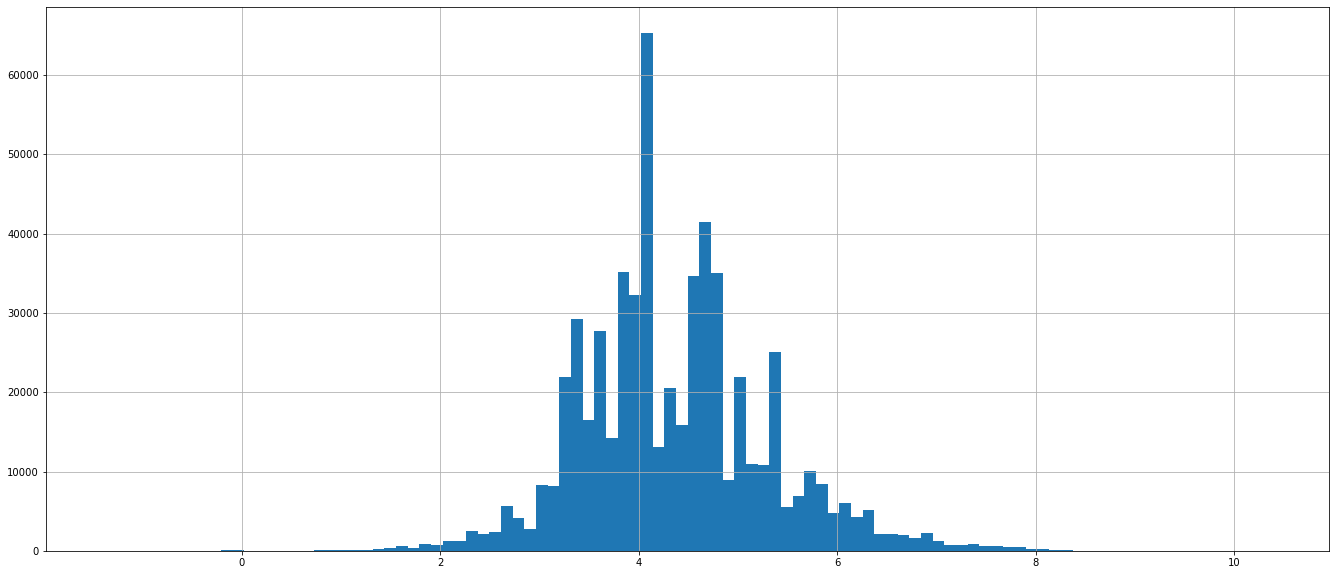

In [306]:
fig = plt.figure(figsize=(23,10))
trans1['log_amt'].hist(bins=100)

In [307]:
trans1['q_log_amt'] = pd.qcut(trans1['log_amt'], q=10, precision=0)

<ipython-input-307-4ec7daba7a8f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trans1['q_log_amt'] = pd.qcut(trans1['log_amt'], q=10, precision=0)


In [308]:
trans1.head(15)

isFraud  TransactionAmt   log_amt    q_log_amt
0         0          68.500  4.226834   (4.1, 4.2]
1         0          29.000  3.367296   (3.3, 3.6]
2         0          59.000  4.077537   (4.1, 4.2]
3         0          50.000  3.912023   (3.9, 4.1]
4         0          50.000  3.912023   (3.9, 4.1]
5         0          49.000  3.891820   (3.6, 3.9]
6         0         159.000  5.068904   (4.8, 5.1]
7         0         422.500  6.046189  (5.6, 10.4]
8         0          15.000  2.708050  (-1.5, 3.3]
9         0         117.000  4.762174   (4.6, 4.8]
10        0          75.887  4.329245   (4.2, 4.6]
11        0          16.495  2.803057  (-1.5, 3.3]
12        0          50.000  3.912023   (3.9, 4.1]
13        0          40.000  3.688879   (3.6, 3.9]
14        0          10.500  2.351375  (-1.5, 3.3]

In [309]:
trans1['q_log_amt'].value_counts()

(4.2, 4.6]     73349
(4.6, 4.8]     72079
(3.6, 3.9]     65116
(3.3, 3.6]     61650
(3.9, 4.1]     59647
(-1.5, 3.3]    59511
(5.6, 10.4]    59053
(5.1, 5.6]     58390
(4.1, 4.2]     49346
(4.8, 5.1]     32399
Name: q_log_amt, dtype: int64

In [310]:
def fraud_rate_calc_1(df,str,n=1000):
    tmp=pd.DataFrame(df.loc[df["isFraud"]==1,str].value_counts())
    tmp1=pd.DataFrame(df[str].value_counts())
    tmp2=pd.concat([tmp,tmp1],axis=1, join = 'inner')
    tmp2.columns=['fraud','total']
    tmp2['fraud_rate']=round(tmp2.iloc[:,0]/tmp2.iloc[:,1]*100,1)
    tmp3=tmp2.sort_values("fraud_rate",ascending=False)
    tmp4=tmp3.loc[tmp3["total"]>=n]
    return tmp4

In [311]:
fraud_rate_calc_1(transaction,"card4",n=1000)
    

fraud   total  fraud_rate
discover            514    6651         7.7
visa              13373  384767         3.5
mastercard         6496  189217         3.4
american express    239    8328         2.9

In [312]:
fraud_rate_calc("card4",n=1000)

fraud   total  fraud_rate
discover            514    6651         7.7
visa              13373  384767         3.5
mastercard         6496  189217         3.4
american express    239    8328         2.9

In [313]:
fraud_rate_calc_1(transaction,"card5",n=1000)

fraud   total  fraud_rate
137.0   1725   11720        14.7
138.0   1682   19737         8.5
162.0    301    4524         6.7
102.0   1832   29105         6.3
219.0    571    9924         5.8
197.0     86    1551         5.5
195.0    681   16945         4.0
224.0   3152   81513         3.9
226.0   8753  296546         3.0
150.0     23    1338         1.7
229.0     32    2048         1.6
117.0    354   25941         1.4
166.0    630   57140         1.1
126.0    105   10298         1.0
202.0     58    7103         0.8

In [314]:
fraud_rate_calc("card5",n=1000)

fraud   total  fraud_rate
137.0   1725   11720        14.7
138.0   1682   19737         8.5
162.0    301    4524         6.7
102.0   1832   29105         6.3
219.0    571    9924         5.8
197.0     86    1551         5.5
195.0    681   16945         4.0
224.0   3152   81513         3.9
226.0   8753  296546         3.0
150.0     23    1338         1.7
229.0     32    2048         1.6
117.0    354   25941         1.4
166.0    630   57140         1.1
126.0    105   10298         1.0
202.0     58    7103         0.8

In [315]:
fraud_rate_calc_1(trans1,'q_log_amt',n=1000)

fraud  total  fraud_rate
(-1.5, 3.3]   3326  59511         5.6
(5.6, 10.4]   3004  59053         5.1
(4.8, 5.1]    1394  32399         4.3
(5.1, 5.6]    2221  58390         3.8
(4.2, 4.6]    2653  73349         3.6
(3.6, 3.9]    2100  65116         3.2
(3.3, 3.6]    1976  61650         3.2
(4.1, 4.2]    1407  49346         2.9
(4.6, 4.8]    1423  72079         2.0
(3.9, 4.1]    1159  59647         1.9

In [856]:
# trans1['q_log_amt'] = pd.qcut(trans1['log_amt'], q=10, labels=range(1,11,1),precision=0)
trans1['q_log_amt'] = pd.qcut(trans1['log_amt'], q=7,labels=range(1,8,1),precision=0)

<ipython-input-856-1406ed25ffa5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trans1['q_log_amt'] = pd.qcut(trans1['log_amt'], q=7,labels=range(1,8,1),precision=0)


In [857]:
trans1['q_log_amt'].value_counts()

3    110846
5    101580
2     85773
1     84420
7     84076
6     65766
4     58079
Name: q_log_amt, dtype: int64

In [858]:
tmp21=fraud_rate_calc_1(trans1,'q_log_amt',n=1000)
tmp21= tmp21.sort_index()
tmp21

fraud   total  fraud_rate
1   4297   84420         5.1
2   2636   85773         3.1
3   2376  110846         2.1
4   2442   58079         4.2
5   2293  101580         2.3
6   2660   65766         4.0
7   3959   84076         4.7

<AxesSubplot:title={'center':'Fraud rate across payment size bins'}, xlabel='Bin', ylabel='Rate(%)'>

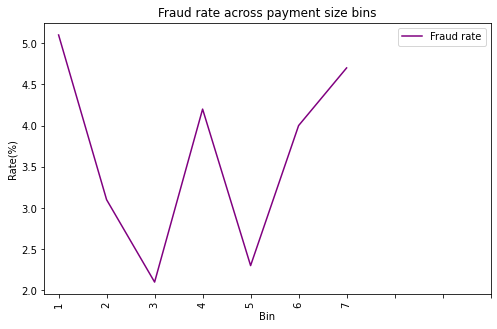

In [859]:
tmp21.plot.line(figsize=(8,5),color='Purple',y='fraud_rate',title= "Fraud rate across payment size bins",label='Fraud rate',
                xticks=range(0,10),rot=90,xlabel='Bin',ylabel='Rate(%)')

<AxesSubplot:>

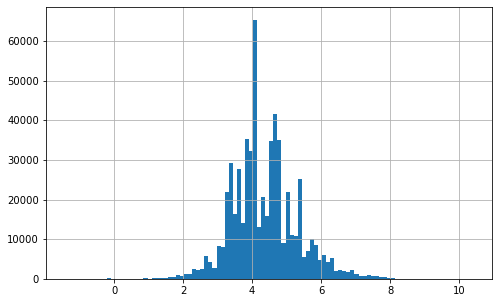

In [364]:
fig = plt.figure(figsize=(8,5))
trans1['log_amt'].hist(bins=100)

In [819]:
trans1.head(25)

isFraud  TransactionAmt   log_amt q_log_amt
0         0          68.500  4.226834         4
1         0          29.000  3.367296         1
2         0          59.000  4.077537         3
3         0          50.000  3.912023         3
4         0          50.000  3.912023         3
5         0          49.000  3.891820         3
6         0         159.000  5.068904         6
7         0         422.500  6.046189         7
8         0          15.000  2.708050         1
9         0         117.000  4.762174         5
10        0          75.887  4.329245         4
11        0          16.495  2.803057         1
12        0          50.000  3.912023         3
13        0          40.000  3.688879         2
14        0          10.500  2.351375         1
15        0          57.950  4.059581         3
16        0          30.000  3.401197         1
17        0         100.000  4.605170         5
18        0          47.950  3.870159         2
19        0         186.000  5.225747         6
20        0          39.000  3.663562         2
21        0         159.950  5.074861         6
22        0          50.000  3.912023         3
23        0         107.950  4.681668         5
24        0          73.950  4.303389         4

In [366]:
trans1["TransactionAmt"].describe()

count    590540.000000
mean        135.027176
std         239.162522
min           0.251000
25%          43.321000
50%          68.769000
75%         125.000000
max       31937.391000
Name: TransactionAmt, dtype: float64

In [860]:
bmp=list(map(lambda x: str(x),trans1["TransactionAmt"]))
bmp2=list(map(lambda x: x.split(".")[1],bmp))
bmp3=pd.Series(list(map(lambda x: len(x)>2,bmp2)),name='dec_3dig')
bmp4=pd.DataFrame(bmp3,index=range(len(bmp3))).astype(int)



In [861]:
trans2=pd.concat([trans1,bmp4],axis=1)
trans2.head(25)

isFraud  TransactionAmt   log_amt q_log_amt  dec_3dig
0         0          68.500  4.226834         4         0
1         0          29.000  3.367296         1         0
2         0          59.000  4.077537         3         0
3         0          50.000  3.912023         3         0
4         0          50.000  3.912023         3         0
5         0          49.000  3.891820         3         0
6         0         159.000  5.068904         6         0
7         0         422.500  6.046189         7         0
8         0          15.000  2.708050         1         0
9         0         117.000  4.762174         5         0
10        0          75.887  4.329245         4         1
11        0          16.495  2.803057         1         1
12        0          50.000  3.912023         3         0
13        0          40.000  3.688879         2         0
14        0          10.500  2.351375         1         0
15        0          57.950  4.059581         3         0
16        0          30.000  3.401197         1         0
17        0         100.000  4.605170         5         0
18        0          47.950  3.870159         2         0
19        0         186.000  5.225747         6         0
20        0          39.000  3.663562         2         0
21        0         159.950  5.074861         6         0
22        0          50.000  3.912023         3         0
23        0         107.950  4.681668         5         0
24        0          73.950  4.303389         4         0

In [862]:
# trans11= trans[['isFraud','card1', 'card2', 'card3', 'card4', 'card5', 'card6']]
trans11= trans[['isFraud','card1', 'card2', 'card3', 'card4', 'card5', 'card6','addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain']]
trans11[['P_emaildomain']][:20]

P_emaildomain
0             NaN
1       gmail.com
2     outlook.com
3       yahoo.com
4       gmail.com
5       gmail.com
6       yahoo.com
7        mail.com
8   anonymous.com
9       yahoo.com
10      gmail.com
11    hotmail.com
12    verizon.net
13        aol.com
14      yahoo.com
15            NaN
16        aol.com
17      yahoo.com
18      gmail.com
19      gmail.com

In [863]:
# creating column q_card1 for binning of card1
trans12=trans11.copy()
s=fraud_rate_calc("card1").loc[:,'fraud_rate']>= 4.0
card1_index=list(s[s].index.values)
# len(card1_index)
mask=trans12[['card1']].isin(card1_index)| trans12[['card1']].isna()
s_card1 = np.array(trans12[['card1']])
s_card1[~mask] = 99991
q_card1=pd.DataFrame(s_card1.reshape(-1,1),columns=["q_card1"])
q_card1.head(50)


q_card1
0     99991
1     99991
2     99991
3     99991
4     99991
5     99991
6     99991
7     99991
8     99991
9     99991
10    99991
11     4461
12    99991
13    99991
14    99991
15    99991
16    99991
17    99991
18    99991
19    99991
20    99991
21    99991
22    99991
23    99991
24    99991
25    99991
26    99991
27    99991
28    99991
29    99991
30    99991
31    99991
32    99991
33    99991
34    99991
35    99991
36    99991
37    99991
38    99991
39    99991
40    99991
41     9002
42    99991
43    99991
44    99991
45    99991
46    99991
47    99991
48    15885
49    99991

In [864]:
# creating column q_card2 for binning of card2
s=fraud_rate_calc("card2").loc[:,'fraud_rate']>= 4.0
card2_index=list(s[s].index.values)
# len(card2_index)
mask=trans12[['card2']].isin(card2_index) | trans12[['card2']].isna()
s_card2 = np.array(trans12[['card2']])
s_card2[~mask] = 99992
q_card2=pd.DataFrame(s_card2.reshape(-1,1),columns=["q_card2"])
q_card2.head(50)



q_card2
0       NaN
1     404.0
2   99992.0
3   99992.0
4     514.0
5   99992.0
6   99992.0
7   99992.0
8   99992.0
9   99992.0
10  99992.0
11    375.0
12  99992.0
13  99992.0
14  99992.0
15  99992.0
16  99992.0
17  99992.0
18  99992.0
19  99992.0
20  99992.0
21  99992.0
22    583.0
23  99992.0
24  99992.0
25  99992.0
26  99992.0
27  99992.0
28  99992.0
29  99992.0
30  99992.0
31    583.0
32  99992.0
33  99992.0
34  99992.0
35  99992.0
36  99992.0
37  99992.0
38  99992.0
39  99992.0
40  99992.0
41    453.0
42    417.0
43  99992.0
44  99992.0
45  99992.0
46  99992.0
47  99992.0
48    545.0
49  99992.0

In [865]:
# creating column q_card3 for binning of card3
s=fraud_rate_calc("card3").loc[:,'fraud_rate']>=4.0
card3_index=list(s[s].index.values)
card3_index
mask=trans12[['card3']].isin(card3_index) | trans12[['card3']].isna()
s_card3 = np.array(trans12[['card3']])
s_card3[~mask] = 99993
q_card3=pd.DataFrame(s_card3.reshape(-1,1),columns=["q_card3"])
q_card3.head(100)



q_card3
0   99993.0
1   99993.0
2   99993.0
3   99993.0
4   99993.0
5   99993.0
6   99993.0
7   99993.0
8   99993.0
9   99993.0
10  99993.0
11    185.0
12  99993.0
13  99993.0
14  99993.0
15  99993.0
16  99993.0
17  99993.0
18  99993.0
19  99993.0
20  99993.0
21  99993.0
22  99993.0
23  99993.0
24  99993.0
25  99993.0
26  99993.0
27  99993.0
28  99993.0
29  99993.0
30  99993.0
31  99993.0
32  99993.0
33  99993.0
34  99993.0
35  99993.0
36  99993.0
37  99993.0
38  99993.0
39  99993.0
40  99993.0
41  99993.0
42  99993.0
43  99993.0
44  99993.0
45  99993.0
46  99993.0
47  99993.0
48    185.0
49    185.0
50  99993.0
51  99993.0
52  99993.0
53  99993.0
54  99993.0
55  99993.0
56  99993.0
57  99993.0
58  99993.0
59  99993.0
60  99993.0
61  99993.0
62  99993.0
63  99993.0
64  99993.0
65  99993.0
66  99993.0
67  99993.0
68    185.0
69  99993.0
70  99993.0
71  99993.0
72    185.0
73  99993.0
74    185.0
75  99993.0
76  99993.0
77  99993.0
78  99993.0
79    185.0
80  99993.0
81  99993.0
82  99993.0
83  99993.0
84    185.0
85    185.0
86  99993.0
87  99993.0
88  99993.0
89  99993.0
90    185.0
91  99993.0
92  99993.0
93  99993.0
94  99993.0
95  99993.0
96  99993.0
97  99993.0
98  99993.0
99  99993.0

In [866]:
# creating column q_card5 for binning of card5
s=fraud_rate_calc("card5").loc[:,'fraud_rate']>=4.0
card5_index=list(s[s].index.values)
card5_index
mask=trans12[['card5']].isin(card5_index) | trans12[['card5']].isna()
s_card5 = np.array(trans12[['card5']])
s_card5[~mask] = 99995
q_card5=pd.DataFrame(s_card5.reshape(-1,1),columns=["q_card5"])
q_card5.head(100)



q_card5
0   99995.0
1     102.0
2   99995.0
3   99995.0
4     102.0
5   99995.0
6   99995.0
7   99995.0
8   99995.0
9   99995.0
10  99995.0
11  99995.0
12  99995.0
13  99995.0
14  99995.0
15  99995.0
16  99995.0
17    219.0
18  99995.0
19  99995.0
20  99995.0
21  99995.0
22  99995.0
23  99995.0
24  99995.0
25  99995.0
26  99995.0
27  99995.0
28  99995.0
29  99995.0
30  99995.0
31  99995.0
32  99995.0
33  99995.0
34  99995.0
35  99995.0
36  99995.0
37  99995.0
38    137.0
39  99995.0
40  99995.0
41  99995.0
42    195.0
43  99995.0
44    195.0
45  99995.0
46  99995.0
47    195.0
48    138.0
49  99995.0
50  99995.0
51  99995.0
52  99995.0
53  99995.0
54  99995.0
55  99995.0
56  99995.0
57  99995.0
58  99995.0
59  99995.0
60  99995.0
61  99995.0
62  99995.0
63  99995.0
64  99995.0
65  99995.0
66  99995.0
67    195.0
68  99995.0
69  99995.0
70    162.0
71    195.0
72  99995.0
73  99995.0
74    138.0
75  99995.0
76  99995.0
77  99995.0
78  99995.0
79    219.0
80  99995.0
81  99995.0
82    102.0
83  99995.0
84  99995.0
85    138.0
86  99995.0
87  99995.0
88  99995.0
89  99995.0
90    138.0
91  99995.0
92  99995.0
93  99995.0
94  99995.0
95  99995.0
96  99995.0
97  99995.0
98  99995.0
99  99995.0

In [867]:
# creating column q_addr1 for binning of addr1
s=fraud_rate_calc("addr1").loc[:,'fraud_rate']>=4.0

addr1_index=list(s[s].index.values)
addr1_index
mask=trans12[['addr1']].isin(addr1_index) | trans12[['addr1']].isna()
s_addr1 = np.array(trans12[['addr1']])
s_addr1[~mask] = 99981
q_addr1=pd.DataFrame(s_addr1.reshape(-1,1),columns=["q_addr1"])
q_addr1[:50]

q_addr1
0   99981.0
1   99981.0
2   99981.0
3   99981.0
4   99981.0
5   99981.0
6   99981.0
7   99981.0
8   99981.0
9   99981.0
10      NaN
11      NaN
12  99981.0
13  99981.0
14  99981.0
15  99981.0
16  99981.0
17  99981.0
18  99981.0
19  99981.0
20  99981.0
21  99981.0
22  99981.0
23  99981.0
24  99981.0
25  99981.0
26  99981.0
27  99981.0
28  99981.0
29  99981.0
30  99981.0
31  99981.0
32  99981.0
33  99981.0
34  99981.0
35  99981.0
36  99981.0
37  99981.0
38  99981.0
39  99981.0
40      NaN
41  99981.0
42  99981.0
43  99981.0
44  99981.0
45  99981.0
46  99981.0
47  99981.0
48      NaN
49      NaN

In [868]:
# creating column q_addr2 for binning of addr2

s=fraud_rate_calc("addr2",500).loc[:,'fraud_rate']>=4.0

addr2_index=list(s[s].index.values)
addr2_index
mask=trans12[['addr2']].isin(addr2_index) | trans12[['addr2']].isna()
s_addr2 = np.array(trans12[['addr2']])
s_addr2[~mask] = 99982
q_addr2=pd.DataFrame(s_addr2.reshape(-1,1),columns=["q_addr2"])
q_addr2.head(50)

q_addr2
0   99982.0
1   99982.0
2   99982.0
3   99982.0
4   99982.0
5   99982.0
6   99982.0
7   99982.0
8   99982.0
9   99982.0
10      NaN
11      NaN
12  99982.0
13  99982.0
14  99982.0
15  99982.0
16  99982.0
17  99982.0
18  99982.0
19  99982.0
20  99982.0
21  99982.0
22  99982.0
23  99982.0
24  99982.0
25  99982.0
26  99982.0
27  99982.0
28  99982.0
29  99982.0
30  99982.0
31  99982.0
32  99982.0
33  99982.0
34  99982.0
35  99982.0
36  99982.0
37  99982.0
38  99982.0
39  99982.0
40      NaN
41  99982.0
42  99982.0
43  99982.0
44  99982.0
45  99982.0
46  99982.0
47  99982.0
48      NaN
49      NaN

In [869]:
# creating column q_addr_na for binning of NA vs non NA in addr1

mask= trans12[['addr1']].isna()
s_addr_na = np.zeros(len(trans12[['addr1']])).reshape(-1,1)
s_addr_na[mask] = 1
q_addr_na=pd.DataFrame(s_addr_na.reshape(-1,1),columns=["q_addr_na"])
np.sum(q_addr_na)

q_addr_na    65706.0
dtype: float64

In [872]:
# creating column q_dist1 for binning of dist1

trans12['q_dist1'] = pd.qcut(trans12['dist1'], q=7,labels=range(1,8,1),precision=0)
trans12['q_dist1'].value_counts()

mask= trans12[['q_dist1']] == 7

s_dist1 = np.zeros(len(trans12[['dist1']])).reshape(-1,1)
s_dist1[mask] = 1

q_dist1=pd.DataFrame(s_dist1.reshape(-1,1),columns=["q_dist1"])
q_dist1.head(50)

q_dist1
0       0.0
1       0.0
2       1.0
3       0.0
4       0.0
5       0.0
6       0.0
7       0.0
8       0.0
9       0.0
10      0.0
11      0.0
12      0.0
13      0.0
14      0.0
15      0.0
16      0.0
17      0.0
18      0.0
19      0.0
20      0.0
21      0.0
22      0.0
23      0.0
24      0.0
25      0.0
26      0.0
27      0.0
28      0.0
29      0.0
30      0.0
31      0.0
32      0.0
33      0.0
34      0.0
35      1.0
36      0.0
37      0.0
38      0.0
39      0.0
40      0.0
41      0.0
42      0.0
43      0.0
44      0.0
45      0.0
46      0.0
47      0.0
48      0.0
49      0.0

<AxesSubplot:title={'center':'Fraud rate across dist1 bins'}, xlabel='Bin', ylabel='Rate(%)'>

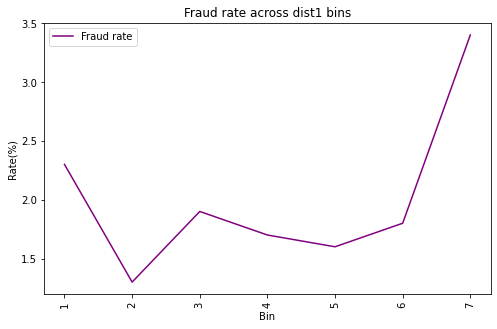

In [873]:
tmp21=fraud_rate_calc_1(trans12,'q_dist1',n=1000)
tmp21= tmp21.sort_index()
tmp21
tmp21.plot.line(figsize=(8,5),color='Purple',y='fraud_rate',title= "Fraud rate across dist1 bins",label='Fraud rate',
                xticks=range(0,7),rot=90,xlabel='Bin',ylabel='Rate(%)')

In [874]:
# creating column q_dist_na for binning of NA vs non NA in dist1

mask= trans12[['dist1']].isna()
s_dist_na = np.zeros(len(trans12[['dist1']])).reshape(-1,1)
s_dist_na[mask] = 1
q_dist_na=pd.DataFrame(s_dist_na.reshape(-1,1),columns=["q_dist_na"])
q_dist_na.head(100)

q_dist_na
0         0.0
1         1.0
2         0.0
3         1.0
4         1.0
5         0.0
6         0.0
7         1.0
8         1.0
9         0.0
10        1.0
11        1.0
12        1.0
13        1.0
14        1.0
15        0.0
16        1.0
17        1.0
18        0.0
19        1.0
20        0.0
21        1.0
22        1.0
23        0.0
24        1.0
25        1.0
26        1.0
27        0.0
28        1.0
29        1.0
30        1.0
31        0.0
32        1.0
33        1.0
34        0.0
35        0.0
36        0.0
37        1.0
38        1.0
39        1.0
40        1.0
41        0.0
42        0.0
43        0.0
44        1.0
45        0.0
46        0.0
47        1.0
48        1.0
49        1.0
50        0.0
51        0.0
52        0.0
53        0.0
54        1.0
55        1.0
56        1.0
57        1.0
58        1.0
59        0.0
60        1.0
61        0.0
62        0.0
63        1.0
64        1.0
65        0.0
66        1.0
67        0.0
68        1.0
69        1.0
70        1.0
71        1.0
72        1.0
73        0.0
74        1.0
75        1.0
76        0.0
77        1.0
78        0.0
79        1.0
80        1.0
81        0.0
82        1.0
83        0.0
84        1.0
85        1.0
86        0.0
87        0.0
88        1.0
89        0.0
90        1.0
91        0.0
92        0.0
93        1.0
94        0.0
95        1.0
96        1.0
97        0.0
98        0.0
99        1.0

In [876]:
# creating column q_P_email for binning of P_emaildomain
s=fraud_rate_calc("P_emaildomain").loc[:,'fraud_rate']>= 4.0
P_email_index=list(s[s].index.values)
P_email_index
mask=trans12[['P_emaildomain']].isin(P_email_index) | trans12[['P_emaildomain']].isna()

s_P_email = np.array(trans12[['P_emaildomain']])
s_P_email[~mask] = 99971
q_P_email=pd.DataFrame(s_P_email.reshape(-1,1),columns=["q_P_email"])
q_P_email.head(100)

q_P_email
0           NaN
1     gmail.com
2   outlook.com
3         99971
4     gmail.com
5     gmail.com
6         99971
7         99971
8         99971
9         99971
10    gmail.com
11  hotmail.com
12        99971
13        99971
14        99971
15          NaN
16        99971
17        99971
18    gmail.com
19    gmail.com
20    gmail.com
21    gmail.com
22    gmail.com
23    gmail.com
24    gmail.com
25    gmail.com
26        99971
27        99971
28          NaN
29    gmail.com
30    gmail.com
31        99971
32        99971
33        99971
34        99971
35        99971
36    gmail.com
37    gmail.com
38          NaN
39        99971
40    gmail.com
41    gmail.com
42    gmail.com
43    gmail.com
44    gmail.com
45        99971
46    gmail.com
47        99971
48  outlook.com
49        99971
50    gmail.com
51        99971
52    gmail.com
53        99971
54    gmail.com
55    gmail.com
56          NaN
57    gmail.com
58          NaN
59    gmail.com
60  hotmail.com
61    gmail.com
62        99971
63        99971
64    gmail.com
65          NaN
66        99971
67          NaN
68  hotmail.com
69          NaN
70        99971
71    gmail.com
72  outlook.com
73        99971
74    gmail.com
75    gmail.com
76          NaN
77    gmail.com
78          NaN
79  hotmail.com
80        99971
81    gmail.com
82        99971
83    gmail.com
84        99971
85        99971
86    gmail.com
87        99971
88    gmail.com
89    gmail.com
90    gmail.com
91          NaN
92        99971
93        99971
94        99971
95        99971
96    gmail.com
97    gmail.com
98  hotmail.com
99    gmail.com

In [878]:
# creating column q_R_email for binning of R_emaildomain
s=fraud_rate_calc("R_emaildomain").loc[:,'fraud_rate']>= 4.0

R_email_index=list(s[s].index.values)
R_email_index
mask=trans12[['R_emaildomain']].isin(R_email_index) | trans12[['R_emaildomain']].isna()


s_R_email = np.array(trans12[['R_emaildomain']])
s_R_email[~mask] = 99972

q_R_email=pd.DataFrame(s_R_email.reshape(-1,1),columns=["q_R_email"])
q_R_email.head(100)

q_R_email
0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
5           NaN
6           NaN
7           NaN
8           NaN
9           NaN
10    gmail.com
11  hotmail.com
12          NaN
13          NaN
14          NaN
15          NaN
16          NaN
17          NaN
18          NaN
19          NaN
20          NaN
21          NaN
22          NaN
23          NaN
24          NaN
25          NaN
26          NaN
27          NaN
28          NaN
29          NaN
30          NaN
31          NaN
32          NaN
33          NaN
34          NaN
35          NaN
36          NaN
37          NaN
38    gmail.com
39          NaN
40    gmail.com
41          NaN
42          NaN
43          NaN
44          NaN
45          NaN
46          NaN
47          NaN
48  outlook.com
49        99972
50          NaN
51          NaN
52          NaN
53          NaN
54          NaN
55          NaN
56          NaN
57          NaN
58          NaN
59          NaN
60          NaN
61          NaN
62          NaN
63          NaN
64          NaN
65          NaN
66          NaN
67          NaN
68  hotmail.com
69  hotmail.com
70          NaN
71          NaN
72  outlook.com
73          NaN
74    gmail.com
75          NaN
76          NaN
77          NaN
78          NaN
79  hotmail.com
80          NaN
81          NaN
82          NaN
83          NaN
84        99972
85        99972
86          NaN
87          NaN
88          NaN
89          NaN
90    gmail.com
91          NaN
92          NaN
93        99972
94          NaN
95          NaN
96          NaN
97          NaN
98          NaN
99    gmail.com

In [879]:
# creating column q_dist_na for binning of NA vs non NA in dist1

mask= trans12[['R_emaildomain']].isna()

s_R_email_na = np.zeros(len(trans12[['R_emaildomain']])).reshape(-1,1)
s_R_email_na[mask] = 1

q_R_email_na=pd.DataFrame(s_R_email_na.reshape(-1,1),columns=["q_R_email_na"])
np.sum(q_R_email_na)

q_R_email_na    453249.0
dtype: float64

In [822]:
trans2.head()

isFraud  TransactionAmt   log_amt q_log_amt  dec_3dig
0        0            68.5  4.226834         4         0
1        0            29.0  3.367296         1         0
2        0            59.0  4.077537         3         0
3        0            50.0  3.912023         3         0
4        0            50.0  3.912023         3         0

In [907]:
trans3=trans2.copy()
trans3_r= trans3['q_log_amt'].replace(to_replace=5,value=3)

trans3_rdf = pd.DataFrame(trans3_r,columns=["q_log_amt"])
trans3_d=trans3.drop('q_log_amt',axis=1)
trans3_f=pd.concat([trans3_d,trans3_rdf],axis=1)

trans3_f.head(50)

isFraud  TransactionAmt   log_amt  dec_3dig q_log_amt
0         0          68.500  4.226834         0         4
1         0          29.000  3.367296         0         1
2         0          59.000  4.077537         0         3
3         0          50.000  3.912023         0         3
4         0          50.000  3.912023         0         3
5         0          49.000  3.891820         0         3
6         0         159.000  5.068904         0         6
7         0         422.500  6.046189         0         7
8         0          15.000  2.708050         0         1
9         0         117.000  4.762174         0         3
10        0          75.887  4.329245         1         4
11        0          16.495  2.803057         1         1
12        0          50.000  3.912023         0         3
13        0          40.000  3.688879         0         2
14        0          10.500  2.351375         0         1
15        0          57.950  4.059581         0         3
16        0          30.000  3.401197         0         1
17        0         100.000  4.605170         0         3
18        0          47.950  3.870159         0         2
19        0         186.000  5.225747         0         6
20        0          39.000  3.663562         0         2
21        0         159.950  5.074861         0         6
22        0          50.000  3.912023         0         3
23        0         107.950  4.681668         0         3
24        0          73.950  4.303389         0         4
25        0         107.950  4.681668         0         3
26        0         184.000  5.214936         0         6
27        0          47.950  3.870159         0         2
28        0          20.000  2.995732         0         1
29        0          36.990  3.610648         0         2
30        0          35.000  3.555348         0         2
31        0         363.890  5.896852         0         7
32        0         200.000  5.298317         0         6
33        0          40.000  3.688879         0         2
34        0         107.950  4.681668         0         3
35        0         107.950  4.681668         0         3
36        0          77.000  4.343805         0         4
37        0          21.950  3.088767         0         1
38        0          25.000  3.218876         0         1
39        0          39.950  3.687629         0         2
40        0          75.887  4.329245         1         4
41        0         774.000  6.651572         0         7
42        0         117.000  4.762174         0         3
43        0          49.000  3.891820         0         3
44        0          39.500  3.676301         0         2
45        0          36.950  3.609566         0         2
46        0          49.000  3.891820         0         3
47        0          15.000  2.708050         0         1
48        0          42.294  3.744645         1         2
49        0           3.595  1.279544         1         1

In [911]:
features1= pd.concat([trans3_f[['q_log_amt','dec_3dig']],transaction[['ProductCD']],q_card1,q_card2,q_card3,transaction[['card4']],q_card5,transaction[['card6']],q_addr1,q_addr2,q_addr_na,q_dist1,q_dist_na,q_P_email,q_R_email,q_R_email_na],axis=1)

In [916]:
features1.head(20)

q_log_amt  dec_3dig ProductCD  q_card1  q_card2  q_card3       card4  \
0          4         0         W    99991      NaN  99993.0    discover   
1          1         0         W    99991    404.0  99993.0  mastercard   
2          3         0         W    99991  99992.0  99993.0        visa   
3          3         0         W    99991  99992.0  99993.0  mastercard   
4          3         0         H    99991    514.0  99993.0  mastercard   
5          3         0         W    99991  99992.0  99993.0        visa   
6          6         0         W    99991  99992.0  99993.0        visa   
7          7         0         W    99991  99992.0  99993.0        visa   
8          1         0         H    99991  99992.0  99993.0        visa   
9          3         0         W    99991  99992.0  99993.0  mastercard   
10         4         1         C    99991  99992.0  99993.0  mastercard   
11         1         1         C     4461    375.0    185.0  mastercard   
12         3         0         W    99991  99992.0  99993.0        visa   
13         2         0         W    99991  99992.0  99993.0        visa   
14         1         0         W    99991  99992.0  99993.0        visa   
15         3         0         W    99991  99992.0  99993.0        visa   
16         1         0         H    99991  99992.0  99993.0        visa   
17         3         0         H    99991  99992.0  99993.0  mastercard   
18         2         0         W    99991  99992.0  99993.0        visa   
19         6         0         W    99991  99992.0  99993.0        visa   

    q_card5   card6  q_addr1  q_addr2  q_addr_na  q_dist1  q_dist_na  \
0   99995.0  credit  99981.0  99982.0        0.0      0.0        0.0   
1     102.0  credit  99981.0  99982.0        0.0      0.0        1.0   
2   99995.0   debit  99981.0  99982.0        0.0      1.0        0.0   
3   99995.0   debit  99981.0  99982.0        0.0      0.0        1.0   
4     102.0  credit  99981.0  99982.0        0.0      0.0        1.0   
5   99995.0   debit  99981.0  99982.0        0.0      0.0        0.0   
6   99995.0   debit  99981.0  99982.0        0.0      0.0        0.0   
7   99995.0   debit  99981.0  99982.0        0.0      0.0        1.0   
8   99995.0   debit  99981.0  99982.0        0.0      0.0        1.0   
9   99995.0   debit  99981.0  99982.0        0.0      0.0        0.0   
10  99995.0  credit      NaN      NaN        1.0      0.0        1.0   
11  99995.0   debit      NaN      NaN        1.0      0.0        1.0   
12  99995.0   debit  99981.0  99982.0        0.0      0.0        1.0   
13  99995.0   debit  99981.0  99982.0        0.0      0.0        1.0   
14  99995.0   debit  99981.0  99982.0        0.0      0.0        1.0   
15  99995.0   debit  99981.0  99982.0        0.0      0.0        0.0   
16  99995.0   debit  99981.0  99982.0        0.0      0.0        1.0   
17    219.0  credit  99981.0  99982.0        0.0      0.0        1.0   
18  99995.0   debit  99981.0  99982.0        0.0      0.0        0.0   
19  99995.0   debit  99981.0  99982.0        0.0      0.0        1.0   

      q_P_email    q_R_email  q_R_email_na  
0           NaN          NaN           1.0  
1     gmail.com          NaN           1.0  
2   outlook.com          NaN           1.0  
3         99971          NaN           1.0  
4     gmail.com          NaN           1.0  
5     gmail.com          NaN           1.0  
6         99971          NaN           1.0  
7         99971          NaN           1.0  
8         99971          NaN           1.0  
9         99971          NaN           1.0  
10    gmail.com    gmail.com           0.0  
11  hotmail.com  hotmail.com           0.0  
12        99971          NaN           1.0  
13        99971          NaN           1.0  
14        99971          NaN           1.0  
15          NaN          NaN           1.0  
16        99971          NaN           1.0  
17        99971          NaN           1.0  
18    gmail.com          NaN           1.0  
19    gmail.co

In [917]:
features1['q_R_email'].value_counts()

gmail.com      57147
99972          36888
hotmail.com    27509
yahoo.com      11842
outlook.com     2507
icloud.com      1398
Name: q_R_email, dtype: int64

In [918]:
features1['q_P_email'].value_counts()

gmail.com      228355
99971          217383
hotmail.com     45250
outlook.com      5096
Name: q_P_email, dtype: int64

In [919]:
features1['q_addr2'].value_counts()

99982.0    521112
60.0         3084
96.0          638
Name: q_addr2, dtype: int64

In [920]:
features1['q_addr1'].value_counts()

99981.0    515957
203.0        3808
324.0        2173
122.0        1617
308.0        1279
Name: q_addr1, dtype: int64

In [921]:
features1['card6'].value_counts()

debit              439938
credit             148986
debit or credit        30
charge card            15
Name: card6, dtype: int64

In [922]:
features1['q_card5'].value_counts()

99995.0    492775
102.0       29105
138.0       19737
195.0       16945
137.0       11720
219.0        9924
162.0        4524
197.0        1551
Name: q_card5, dtype: int64

In [923]:
features1['card4'].value_counts()

visa                384767
mastercard          189217
american express      8328
discover              6651
Name: card4, dtype: int64

In [924]:
features1['q_card3'].value_counts()

99993.0    531377
185.0       56346
144.0        1252
Name: q_card3, dtype: int64

In [925]:
features1['q_card2'].value_counts()

99992.0    471853
583.0       21803
545.0       16355
514.0       14541
408.0        8012
553.0        6495
375.0        5473
327.0        5100
500.0        5045
103.0        3468
404.0        3056
204.0        2994
130.0        2746
453.0        2597
296.0        2516
417.0        2340
142.0        1685
181.0        1655
177.0        1642
158.0        1149
548.0        1082
Name: q_card2, dtype: int64

In [926]:
features1['q_card1'].value_counts()

99991    520510
15885     10361
6019       6771
7585       5334
3154       4614
2616       4410
9633       4158
16075      3748
5812       2818
7664       2792
4461       2686
15063      2522
10486      2505
9026       2076
13832      2062
2455       1799
1893       1651
9803       1538
11201      1379
2256       1343
9300       1186
8755       1110
6170       1094
9002       1060
16062      1013
Name: q_card1, dtype: int64

In [927]:
features1['ProductCD'].value_counts()

W    439670
C     68519
R     37699
H     33024
S     11628
Name: ProductCD, dtype: int64

In [928]:
features1['q_log_amt'].value_counts()

3    212426
2     85773
1     84420
7     84076
6     65766
4     58079
Name: q_log_amt, dtype: int64

In [930]:
fc=features1.copy()

In [932]:
log_amt_d = pd.get_dummies(fc['q_log_amt'], prefix='log_amt', prefix_sep='__')
log_amt_d = log_amt_d.drop('log_amt__3', axis=1)
log_amt_d.head(20)

log_amt__1  log_amt__2  log_amt__4  log_amt__6  log_amt__7
0            0           0           1           0           0
1            1           0           0           0           0
2            0           0           0           0           0
3            0           0           0           0           0
4            0           0           0           0           0
5            0           0           0           0           0
6            0           0           0           1           0
7            0           0           0           0           1
8            1           0           0           0           0
9            0           0           0           0           0
10           0           0           1           0           0
11           1           0           0           0           0
12           0           0           0           0           0
13           0           1           0           0           0
14           1           0           0           0           0
15           0           0           0           0           0
16           1           0           0           0           0
17           0           0           0           0           0
18           0           1           0           0           0
19           0           0           0           1           0

In [937]:
ProductCD_d = pd.get_dummies(fc['ProductCD'], prefix='ProductCD', prefix_sep='__')
ProductCD_d = ProductCD_d.drop('ProductCD__W', axis=1)
ProductCD_d.head(20)

ProductCD__C  ProductCD__H  ProductCD__R  ProductCD__S
0              0             0             0             0
1              0             0             0             0
2              0             0             0             0
3              0             0             0             0
4              0             1             0             0
5              0             0             0             0
6              0             0             0             0
7              0             0             0             0
8              0             1             0             0
9              0             0             0             0
10             1             0             0             0
11             1             0             0             0
12             0             0             0             0
13             0             0             0             0
14             0             0             0             0
15             0             0             0             0
16             0             1             0             0
17             0             1             0             0
18             0             0             0             0
19             0             0             0             0

In [939]:
q_card1_d = pd.get_dummies(fc['q_card1'], prefix='q_card1', prefix_sep='__')
q_card1_d = q_card1_d.drop('q_card1__99991', axis=1)
q_card1_d.head(20)

q_card1__1893  q_card1__2256  q_card1__2455  q_card1__2616  q_card1__3154  \
0               0              0              0              0              0   
1               0              0              0              0              0   
2               0              0              0              0              0   
3               0              0              0              0              0   
4               0              0              0              0              0   
5               0              0              0              0              0   
6               0              0              0              0              0   
7               0              0              0              0              0   
8               0              0              0              0              0   
9               0              0              0              0              0   
10              0              0              0              0              0   
11              0              0              0              0              0   
12              0              0              0              0              0   
13              0              0              0              0              0   
14              0              0              0              0              0   
15              0              0              0              0              0   
16              0              0              0              0              0   
17              0              0              0              0              0   
18              0              0              0              0              0   
19              0              0              0              0              0   

    q_card1__4461  q_card1__5812  q_card1__6019  q_card1__6170  q_card1__7585  \
0               0              0              0              0              0   
1               0              0              0              0              0   
2               0              0              0              0              0   
3               0              0              0              0              0   
4               0              0              0              0              0   
5               0              0              0              0              0   
6               0              0              0              0              0   
7               0              0              0              0              0   
8               0              0              0              0              0   
9               0              0              0              0              0   
10              0              0              0              0              0   
11              1              0              0              0              0   
12              0              0              0              0              0   
13              0              0              0              0              0   
14              0              0              0              0              0   
15              0              0              0              0              0   
16              0              0              0              0              0   
17              0              0              0              0              0   
18              0              0              0              0              0   
19              0              0              0              0              0   

    q_card1__7664  q_card1__8755  q_card1__9002  q_card1__9026  q_card1__9300  \
0               0              0              0              0              0   
1               0              0              0              0              0   
2               0              0              0              0              0   
3               0              0              0              0              0   
4               0              0              0              0              0   
5               0              0              0              0              0   
6               0              0 

In [943]:
q_card2_d = pd.get_dummies(fc['q_card2'], prefix='q_card2', prefix_sep='__')
q_card2_d = q_card2_d.drop('q_card2__99992.0', axis=1)
q_card2_d.head(20)

q_card2__103.0  q_card2__130.0  q_card2__142.0  q_card2__158.0  \
0                0               0               0               0   
1                0               0               0               0   
2                0               0               0               0   
3                0               0               0               0   
4                0               0               0               0   
5                0               0               0               0   
6                0               0               0               0   
7                0               0               0               0   
8                0               0               0               0   
9                0               0               0               0   
10               0               0               0               0   
11               0               0               0               0   
12               0               0               0               0   
13               0               0               0               0   
14               0               0               0               0   
15               0               0               0               0   
16               0               0               0               0   
17               0               0               0               0   
18               0               0               0               0   
19               0               0               0               0   

    q_card2__177.0  q_card2__181.0  q_card2__204.0  q_card2__296.0  \
0                0               0               0               0   
1                0               0               0               0   
2                0               0               0               0   
3                0               0               0               0   
4                0               0               0               0   
5                0               0               0               0   
6                0               0               0               0   
7                0               0               0               0   
8                0               0               0               0   
9                0               0               0               0   
10               0               0               0               0   
11               0               0               0               0   
12               0               0               0               0   
13               0               0               0               0   
14               0               0               0               0   
15               0               0               0               0   
16               0               0               0               0   
17               0               0               0               0   
18               0               0               0               0   
19               0               0               0               0   

    q_card2__327.0  q_card2__375.0  q_card2__404.0  q_card2__408.0  \
0                0               0               0               0   
1                0               0               1               0   
2                0               0               0               0   
3                0               0               0               0   
4                0               0               0               0   
5                0               0               0               0   
6                0               0               0               0   
7                0               0               0               0   
8                0               0               0               0   
9                0               0               0               0   
10               0               0               0               0   
11               0               1               0               0   
12               0               0               0               0   
13               0               0               0               0   
14          

In [945]:
q_card3_d = pd.get_dummies(fc['q_card3'], prefix='q_card3', prefix_sep='__')
q_card3_d = q_card3_d.drop('q_card3__99993.0', axis=1)
q_card3_d.head(20)

q_card3__144.0  q_card3__185.0
0                0               0
1                0               0
2                0               0
3                0               0
4                0               0
5                0               0
6                0               0
7                0               0
8                0               0
9                0               0
10               0               0
11               0               1
12               0               0
13               0               0
14               0               0
15               0               0
16               0               0
17               0               0
18               0               0
19               0               0

In [947]:
card4_d = pd.get_dummies(fc['card4'], prefix='card4', prefix_sep='__')
card4_d = card4_d.drop('card4__visa', axis=1)
card4_d.head(20)

card4__american express  card4__discover  card4__mastercard
0                         0                1                  0
1                         0                0                  1
2                         0                0                  0
3                         0                0                  1
4                         0                0                  1
5                         0                0                  0
6                         0                0                  0
7                         0                0                  0
8                         0                0                  0
9                         0                0                  1
10                        0                0                  1
11                        0                0                  1
12                        0                0                  0
13                        0                0                  0
14                        0                0                  0
15                        0                0                  0
16                        0                0                  0
17                        0                0                  1
18                        0                0                  0
19                        0                0                  0

In [ ]:
q_card_d = pd.get_dummies(fc['q_card5'], prefix='q_card5', prefix_sep='__')
q_card3_d = q_card3_d.drop('q_card3__99993.0', axis=1)
q_card3_d.head(20)